In [262]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from matplotlib.ticker import FuncFormatter, MaxNLocator
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

Описание проекта

    Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Инструкция по выполнению проекта

Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: /datasets/games.csv. Скачать датасет

Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости: 
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    
    Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
    Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод

Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.
    Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
    Данные за 2016 год могут быть неполными.


## Шаг 1 

In [263]:
# чтение данных
df = pd.read_csv('/Users/sergejnikitin/Downloads/games.csv', sep=',')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Шаг 2

#### заменим названия колонок

In [264]:

df.columns = df.columns.str.lower()

#### информация о данных

In [265]:
# информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [266]:
# информация о типах данных
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [267]:
# информация о датафрейме
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [268]:
# функция для просмостра уникальных значений в колонке
def unique_val(df):
    for col in df.columns:
        print(f'\nColumn name: {col} \n')
        print(df[col].unique())

In [269]:
unique_val(df)


Column name: name 

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Column name: platform 

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Column name: year_of_release 

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Column name: genre 

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Column name: na_sales 

[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00

In [270]:
# отдельно проверим количество нулевых значений в колонках
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### удаление дубликатов и заполнение пропусков

необходимо удалить строки с нулевыми значениями в колонке "year_of_release", так как невозможно логически заменить значения в данной колонке, и в дальнейшем будет только мешать при анализе

In [271]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

Заполнить пропуски в столбцах user_score и critic_score невозможно, так как все оценки являются уникальными. Аббревиатуру "tbd" заменю на NaN, так как она означает, что для выставления окончательной оценки недостаточно данных.

In [272]:
df['user_score']=df['user_score'].replace({'tbd':np.NaN})
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [273]:
df['critic_score'] = df['critic_score'].fillna(-1)

заменим типы данных в опреденных колонках

In [274]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = df['critic_score'].astype(int)
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


необходимо удалить дубликаты

In [275]:
df.duplicated().sum()

0

- явных дубликатов нет

In [276]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [278]:
df[['name','platform','year_of_release']].duplicated().sum()

1

In [279]:
df = df.dropna(subset=['name','platform','year_of_release']).reset_index(drop=True)

In [280]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [281]:
df.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

При анализе значений выделяются такие рейтинги, как: 
- EC - («Early childhood») — «Для детей младшего возраста», 
- K-A - Kids to Adults (K-A), 
- AO - («Adults Only 18+») — «Только для взрослых», 
- RP - («Rating Pending») — «Рейтинг ожидается». 

Следует отметить, что рейтинг K-A - Kids to Adults уже устарел, и в настоящее время он был изменен организацией на рейтинг "E". Давайте обновим этот рейтинг. Поскольку пустых значений в данных много и не представляется возможным заполнить их логически одним жанром из-за отсутствия других критериев, заменим эти пустые значения на "None".


In [282]:

df.loc[df['rating'] == 'K-A','rating'] = 'E'

In [283]:
df.rating = df.rating.fillna('None')

In [284]:
df.rating.value_counts()

None    6676
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

- дубликаты отсутствуют и пропуски обработны

#### Добавим столбец с общими продажами со всех регионов

In [285]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,None,31.38


#### **ВЫВОД**

- Привели названия колонок к нижнему регистру 
- Изменены типы данных, там где это было необходимо
- Аббревиатура "tbd" заменена на NaN, т.к. она означает, недостаточное количество оценок для выставления общей.
- Провели проверку на дубликаты(дубликатов не оказалось)
- Добавили колонку с суммарными продажами

## Шаг 3

### Исследовательский анализ данных

#### посмотрим сколько игр выпускалось в разные годы

In [286]:

# df.groupby('year_of_release').agg({'name':'count'})

game_releases = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
game_releases.columns = ['count_games']
game_releases

,count_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


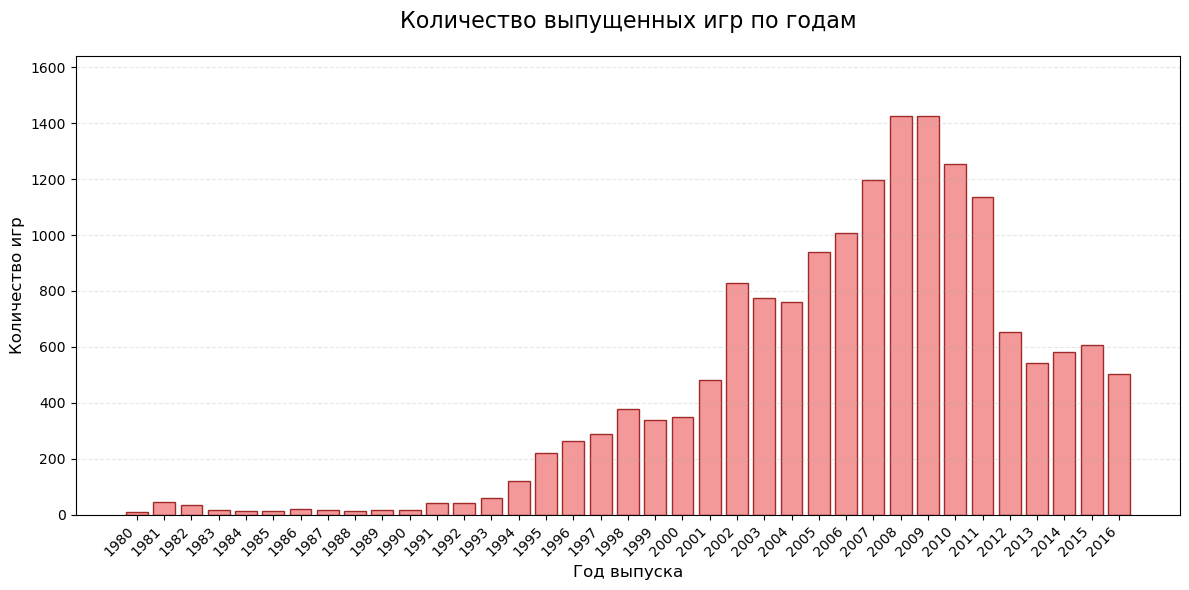

In [287]:
# Сбрасываем индекс, чтобы работать с year_of_release как с обычной колонкой
game_releases_reset = game_releases.reset_index()
# или можно сразу сортировать по годам
game_releases_reset = game_releases_reset.sort_values('year_of_release')

# Включаем поддержку русского шрифта
plt.rcParams['font.family'] = 'DejaVu Sans'  # или 'Arial' если установлен

# Создаем график
fig, ax = plt.subplots(figsize=(12, 6))

# Берем данные из вашей таблицы
years = game_releases_reset['year_of_release']
counts = game_releases_reset['count_games']

# Столбчатая диаграмма
bars = ax.bar(years, counts, color='lightcoral', edgecolor='darkred', alpha=0.8)

# Добавляем подписи значений над столбцами (если лет не слишком много)
if len(years) <= 20:  # добавляем подписи только если лет не больше 20
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Настраиваем заголовки и подписи осей
ax.set_title('Количество выпущенных игр по годам', fontsize=16, pad=20)
ax.set_xlabel('Год выпуска', fontsize=12)
ax.set_ylabel('Количество игр', fontsize=12)

# Настраиваем ось X для лучшей читаемости
ax.set_xticks(years)
if len(years) > 10:  # если много лет, поворачиваем подписи
    plt.xticks(rotation=45, ha='right')
else:
    plt.xticks(rotation=0)

# Сетка
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Автоматический подбор диапазона оси Y
ax.set_ylim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()

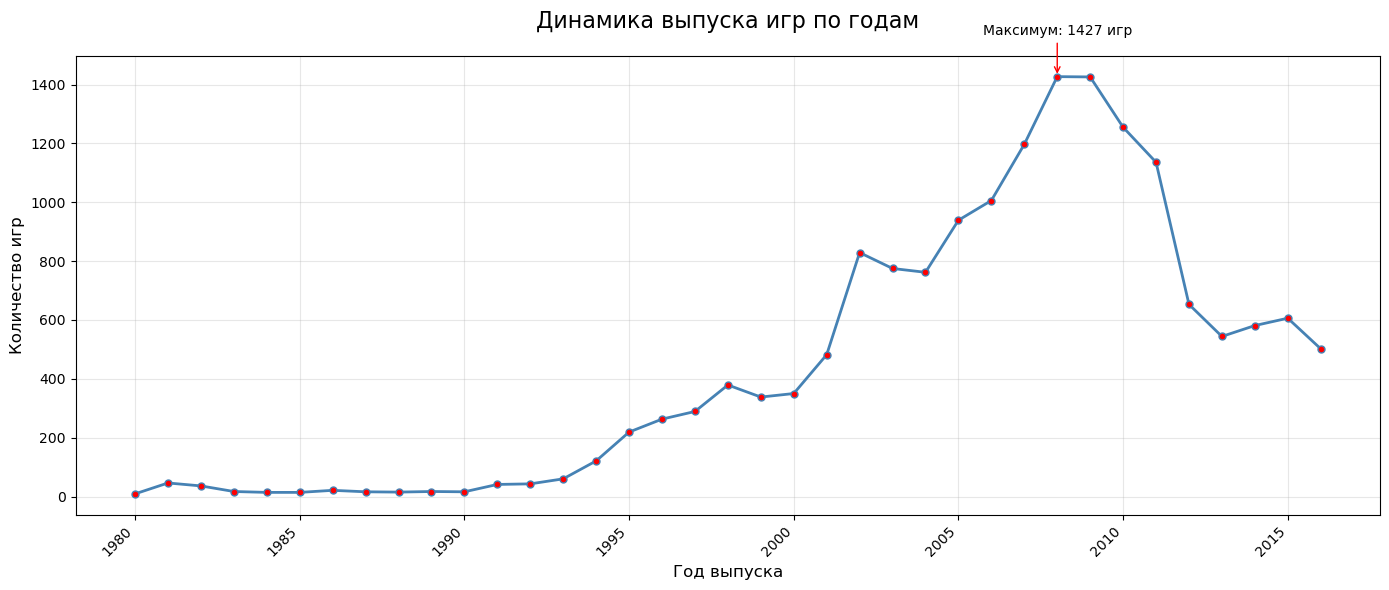

In [288]:
fig, ax = plt.subplots(figsize=(14, 6))

# Линейный график
ax.plot(game_releases_reset['year_of_release'], 
        game_releases_reset['count_games'], 
        marker='o', linewidth=2, markersize=5,
        color='steelblue', markerfacecolor='red')

# Заголовки
ax.set_title('Динамика выпуска игр по годам', fontsize=16, pad=20)
ax.set_xlabel('Год выпуска', fontsize=12)
ax.set_ylabel('Количество игр', fontsize=12)

# Настройка оси X
if len(game_releases_reset) > 10:
    plt.xticks(rotation=45, ha='right')

# Сетка
ax.grid(alpha=0.3)

# Выделяем максимальное значение
max_idx = game_releases_reset['count_games'].idxmax()
max_year = game_releases_reset.loc[max_idx, 'year_of_release']
max_count = game_releases_reset.loc[max_idx, 'count_games']

ax.annotate(f'Максимум: {max_count} игр',
            xy=(max_year, max_count),
            xytext=(max_year, max_count + max(counts)*0.1),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, ha='center')

plt.tight_layout()
plt.show()

In [289]:
print(f"Количество лет в данных: {len(game_releases)}")
print(f"Диапазон лет: {game_releases_reset['year_of_release'].min()} - {game_releases_reset['year_of_release'].max()}")
print(f"Год с максимальным количеством игр: {game_releases_reset.loc[game_releases_reset['count_games'].idxmax(), 'year_of_release']}")

Количество лет в данных: 37
Диапазон лет: 1980 - 2016
Год с максимальным количеством игр: 2008


#### посмотрим как менялись продажи по платформам

In [290]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,None,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,None,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,NaN,None,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,None,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,NaN,None,0.01


In [291]:
df_sales = pd.pivot_table(df, index='platform', values='total_sales', aggfunc='sum')
df_sales = df_sales.sort_values(by='total_sales', ascending=False)
df_sales.columns = ['sum_total_sales']

In [292]:
df_sales

,sum_total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [293]:

# Выбираем топ-10 платформ для анализа 
top_n = 10  
top_platforms = df_sales.head(top_n).index.tolist()
print(f"Топ-{top_n} платформ по продажам:")
print(top_platforms)


Топ-10 платформ по продажам:
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


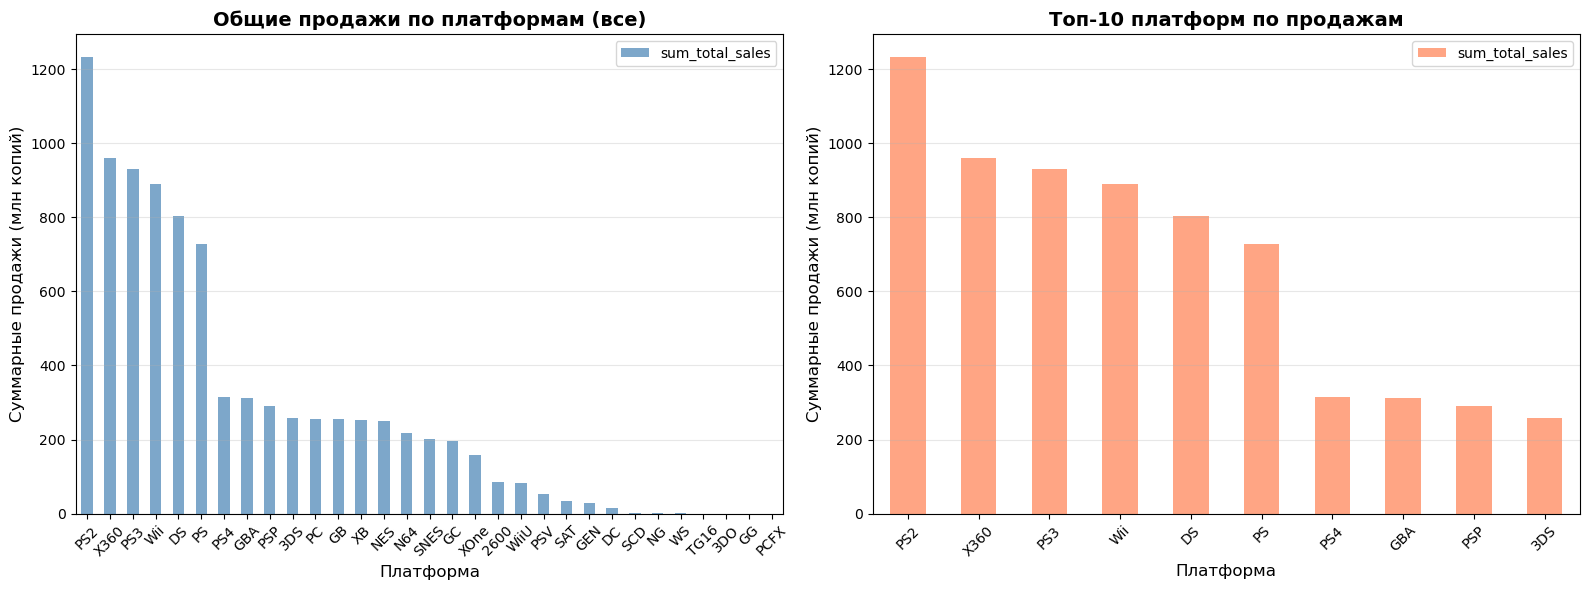

In [294]:
# График 1: Общие продажи по платформам (все платформы)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Левый график: все платформы
df_sales.plot(kind='bar', ax=ax1, color='steelblue', alpha=0.7)
ax1.set_title('Общие продажи по платформам (все)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Платформа', fontsize=12)
ax1.set_ylabel('Суммарные продажи (млн копий)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Правый график: только топ-N платформ
df_sales.head(top_n).plot(kind='bar', ax=ax2, color='coral', alpha=0.7)
ax2.set_title(f'Топ-{top_n} платформ по продажам', fontsize=14, fontweight='bold')
ax2.set_xlabel('Платформа', fontsize=12)
ax2.set_ylabel('Суммарные продажи (млн копий)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [295]:

print(f"Топ-{top_n} платформ для детального анализа:")
for i, platform in enumerate(top_platforms, 1):
    total_sales = df_sales.loc[platform, 'sum_total_sales']
    print(f"{i}. {platform}: {total_sales:.2f} млн копий")

Топ-10 платформ для детального анализа:
1. PS2: 1233.56 млн копий
2. X360: 961.24 млн копий
3. PS3: 931.34 млн копий
4. Wii: 891.18 млн копий
5. DS: 802.78 млн копий
6. PS: 727.58 млн копий
7. PS4: 314.14 млн копий
8. GBA: 312.88 млн копий
9. PSP: 289.53 млн копий
10. 3DS: 257.81 млн копий


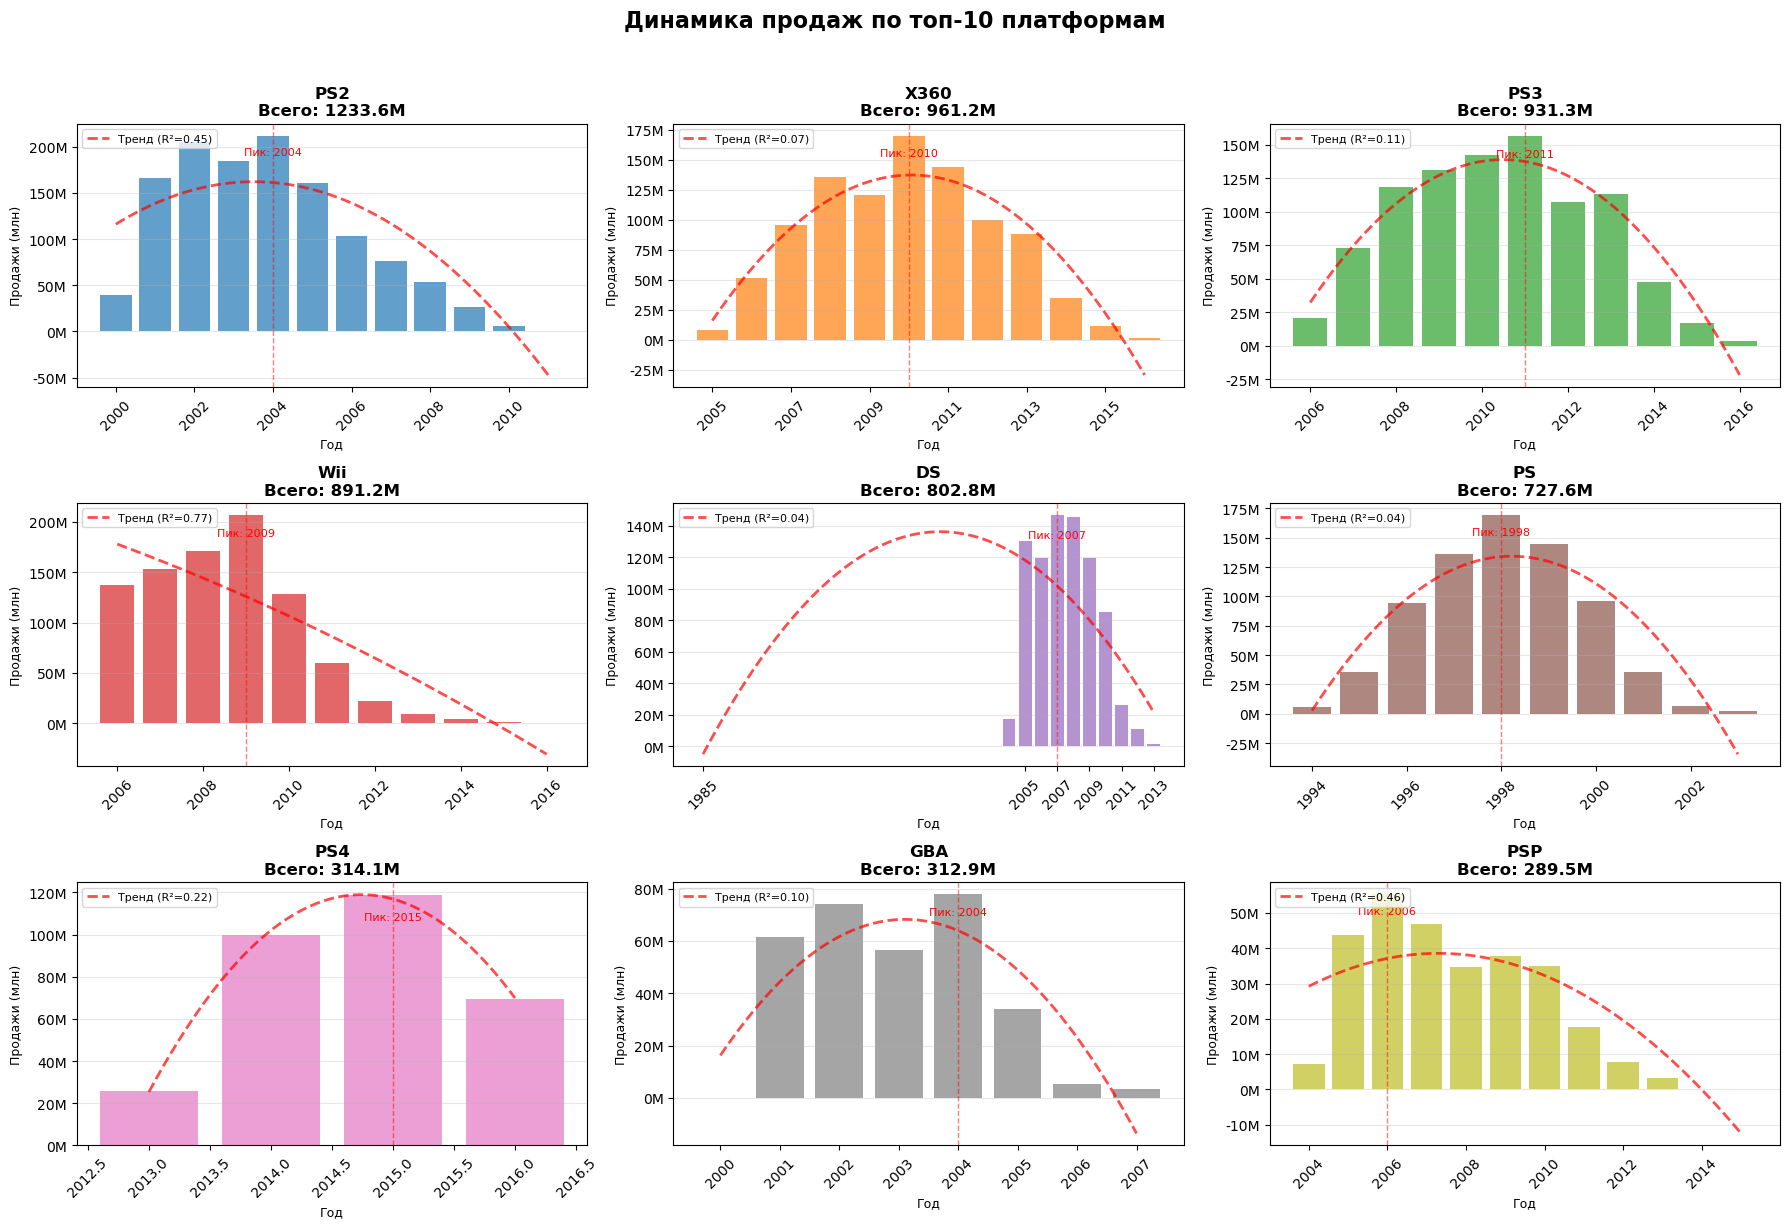

In [296]:
# Вариант А: Все платформы на одном рисунке с подграфиками
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Преобразуем в плоский массив

# Форматтер для осей Y (чтобы отображались миллионы)
def millions(x, pos):
    return f'{x:.0f}M'

formatter = FuncFormatter(millions)

for i, platform in enumerate(top_platforms):
    if i < len(axes):
        ax = axes[i]
        
        # Фильтруем данные по платформе
        platform_data = df[df['platform'] == platform]
        
        if not platform_data.empty:
            # Группируем по годам
            yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
            yearly_sales = yearly_sales.sort_index()
            
            # Столбчатая диаграмма
            bars = ax.bar(yearly_sales.index, yearly_sales.values, 
                         color=plt.cm.tab20(i/len(top_platforms)), alpha=0.7)
            
            # Линия тренда
            if len(yearly_sales) > 1:
                # Полиномиальная линия тренда (степень 2)
                z = np.polyfit(yearly_sales.index, yearly_sales.values, 2)
                p = np.poly1d(z)
                trend_x = np.linspace(yearly_sales.index.min(), yearly_sales.index.max(), 100)
                ax.plot(trend_x, p(trend_x), "r--", linewidth=2, alpha=0.7, 
                       label=f'Тренд (R²={(np.corrcoef(yearly_sales.index, yearly_sales.values)[0,1]**2):.2f})')
            
            # Настройки графика
            ax.set_title(f'{platform}\nВсего: {df_sales.loc[platform, "sum_total_sales"]:.1f}M', 
                        fontsize=12, fontweight='bold')
            ax.set_xlabel('Год', fontsize=9)
            ax.set_ylabel('Продажи (млн)', fontsize=9)
            ax.yaxis.set_major_formatter(formatter)
            
            # Настройка оси X
            if len(yearly_sales) > 8:
                ax.set_xticks(yearly_sales.index[::2])  # показываем каждый второй год
            ax.tick_params(axis='x', rotation=45)
            
            # Сетка
            ax.grid(axis='y', alpha=0.3)
            
            # Выделяем год с максимальными продажами
            max_year = yearly_sales.idxmax()
            max_sales = yearly_sales.max()
            ax.axvline(x=max_year, color='red', linestyle='--', alpha=0.5, linewidth=1)
            ax.text(max_year, max_sales * 0.9, f'Пик: {max_year}', 
                   ha='center', fontsize=8, color='red')
            
            # Легенда для тренда
            if len(yearly_sales) > 1:
                ax.legend(loc='upper left', fontsize=8)
        else:
            ax.text(0.5, 0.5, 'Нет данных', ha='center', va='center', transform=ax.transAxes)
    else:
        break

# Скрываем лишние subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle(f'Динамика продаж по топ-{top_n} платформам', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

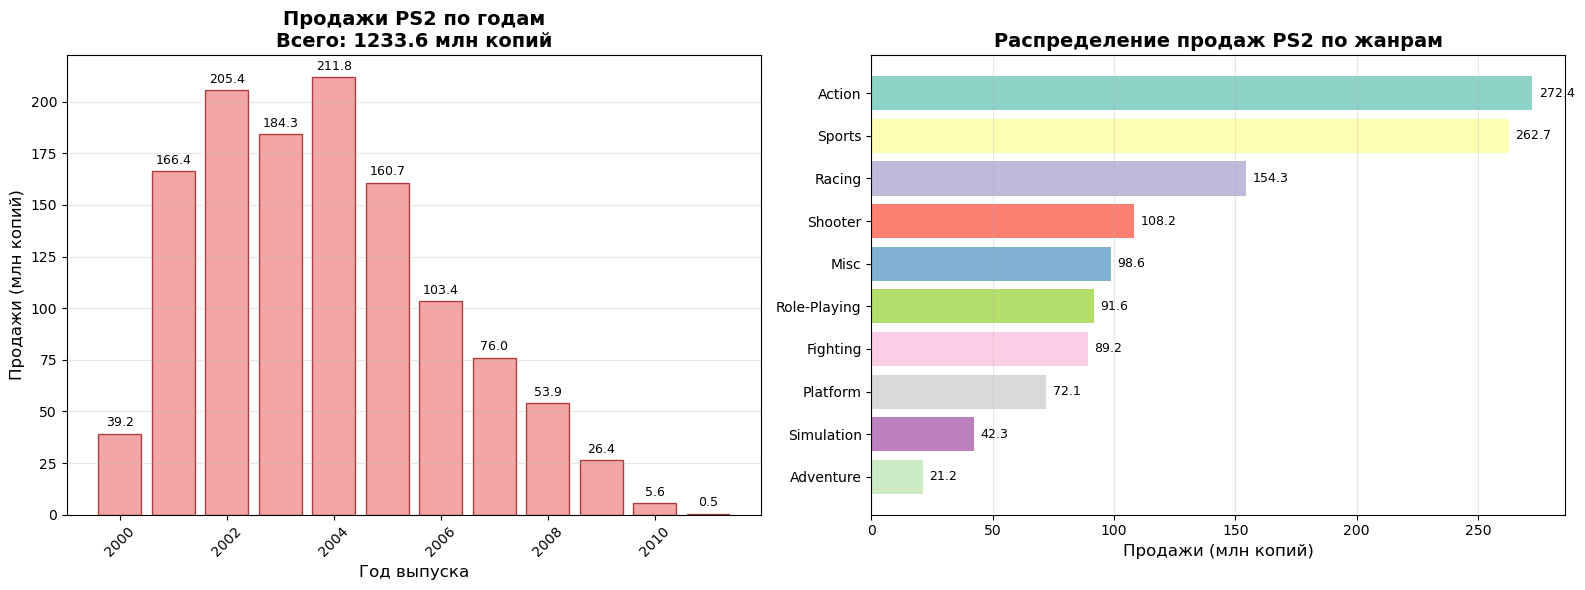

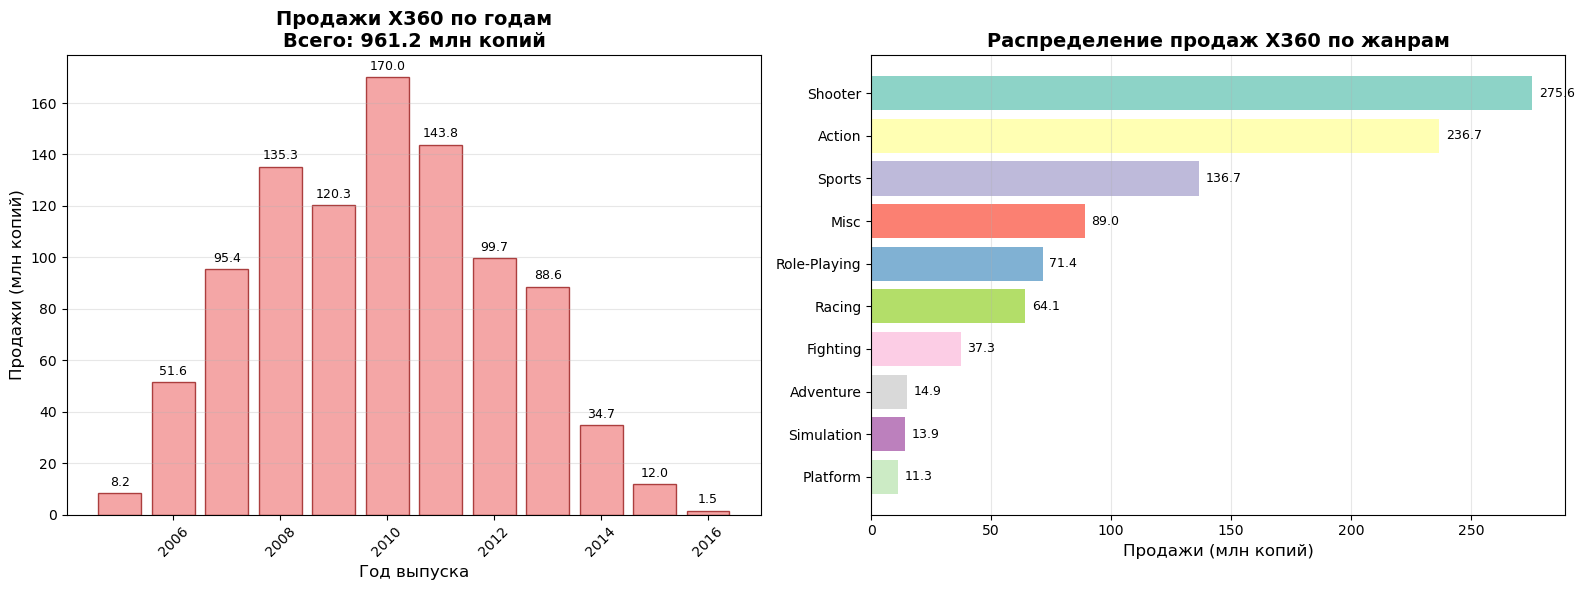

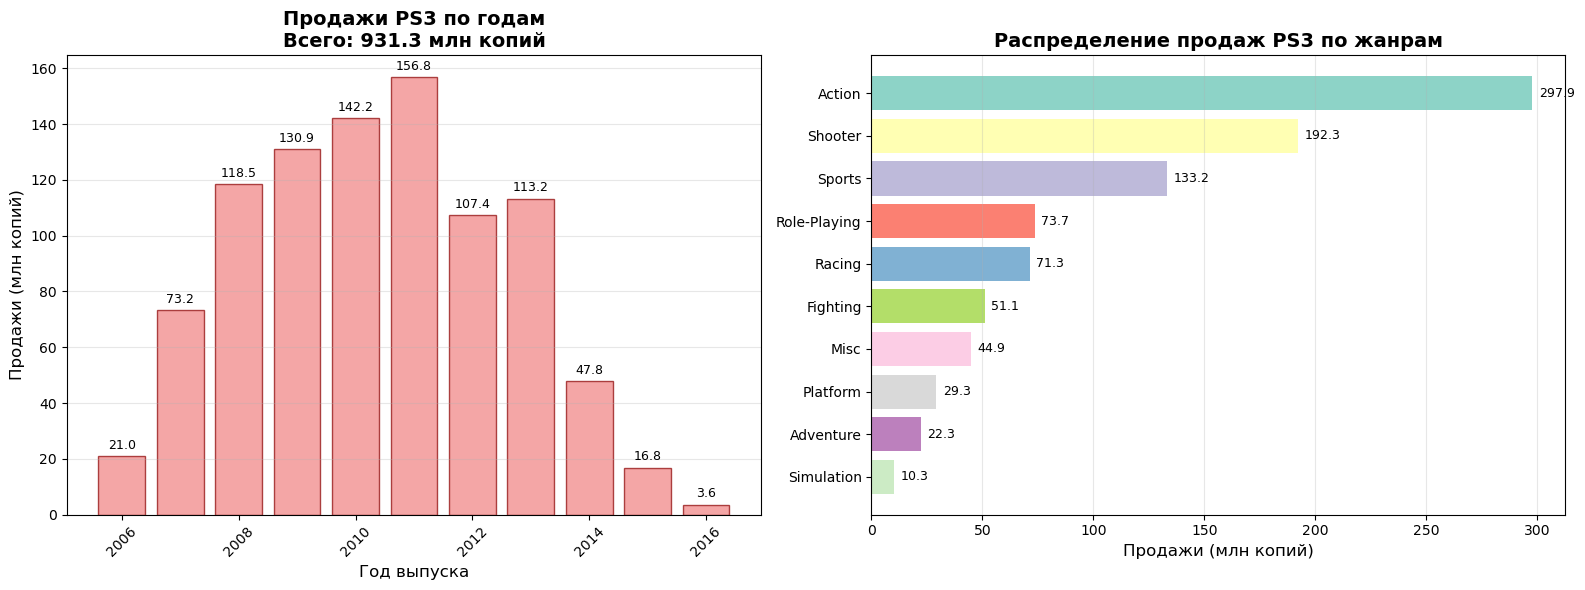

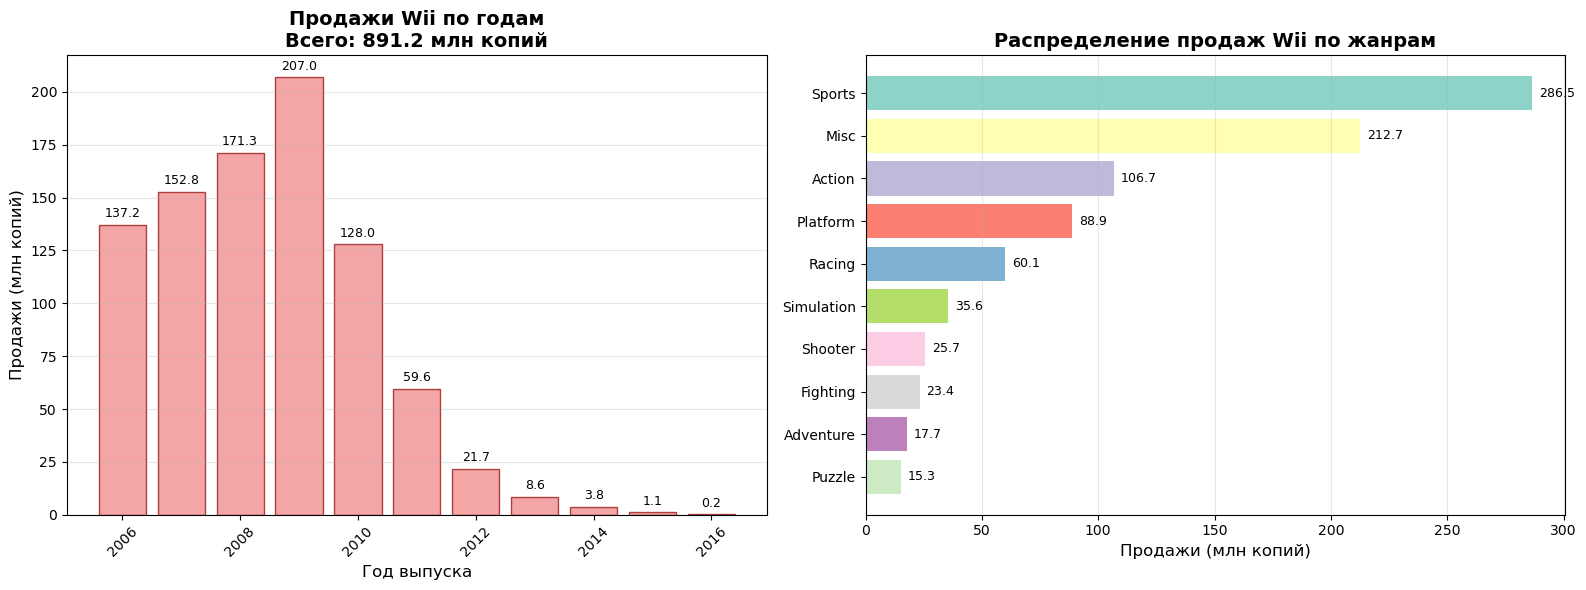

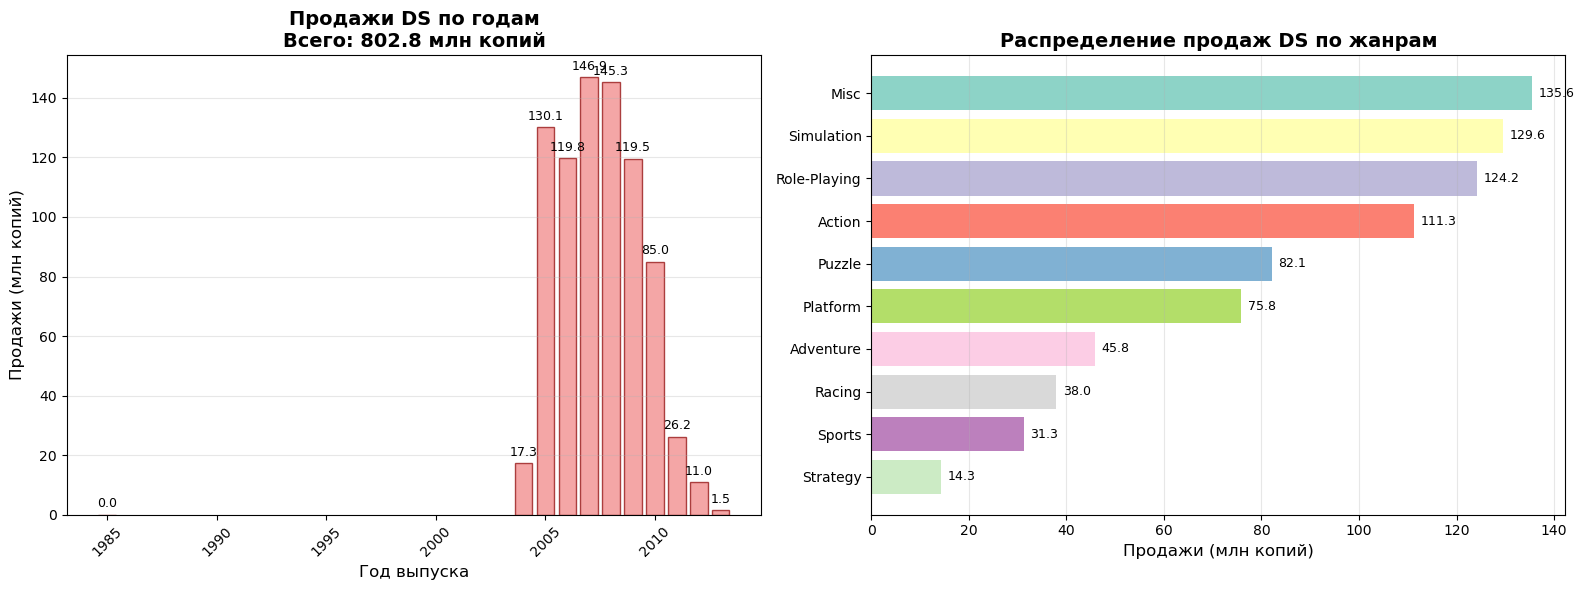

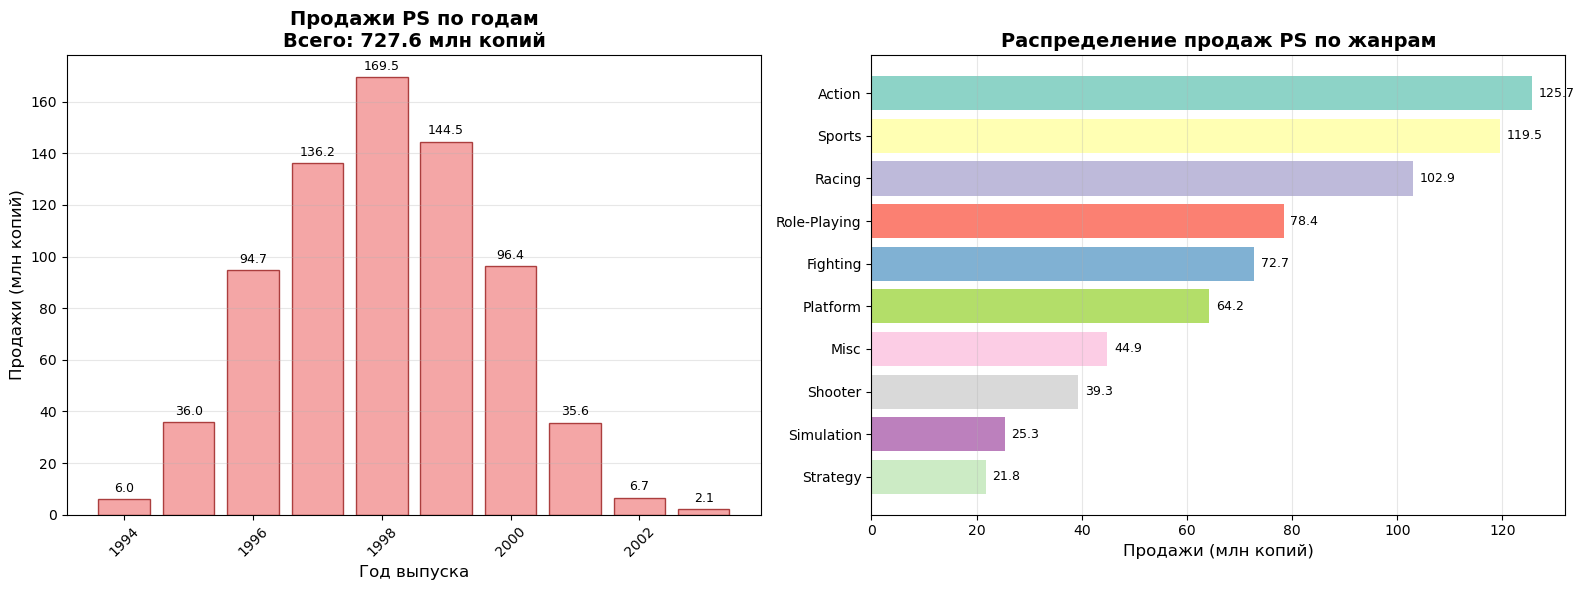

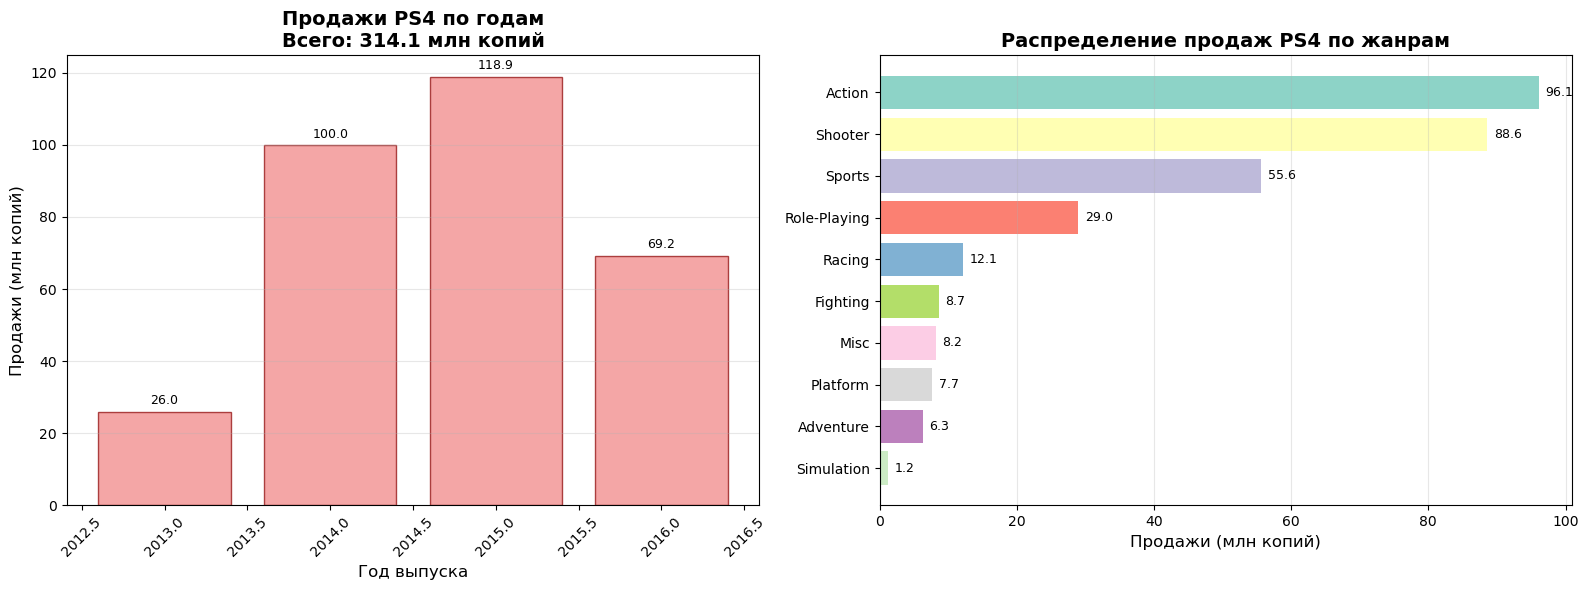

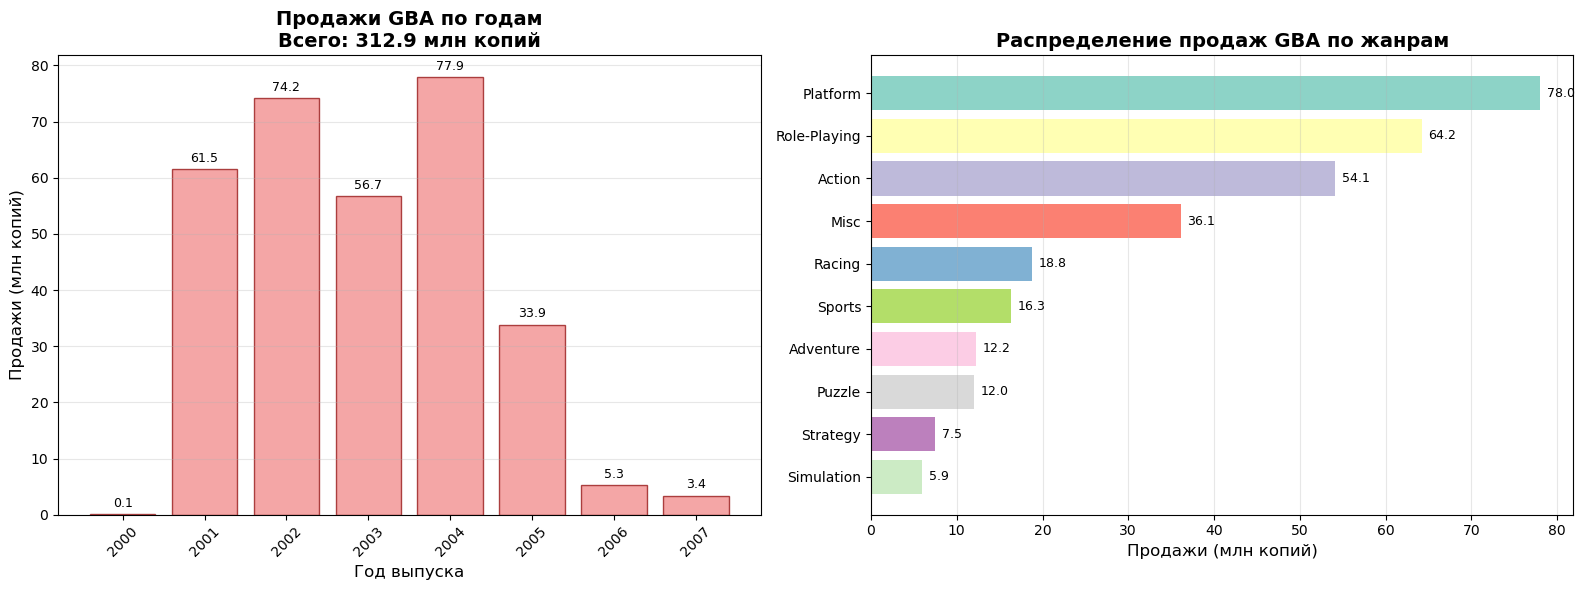

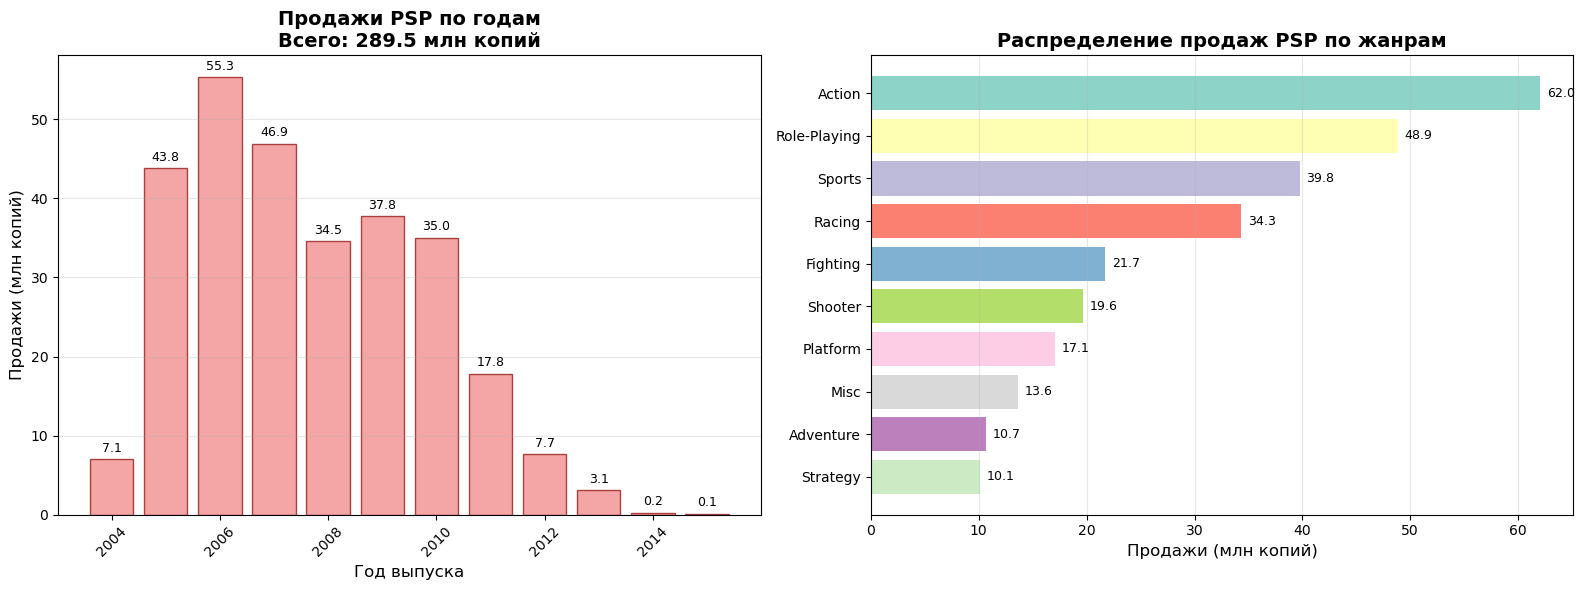

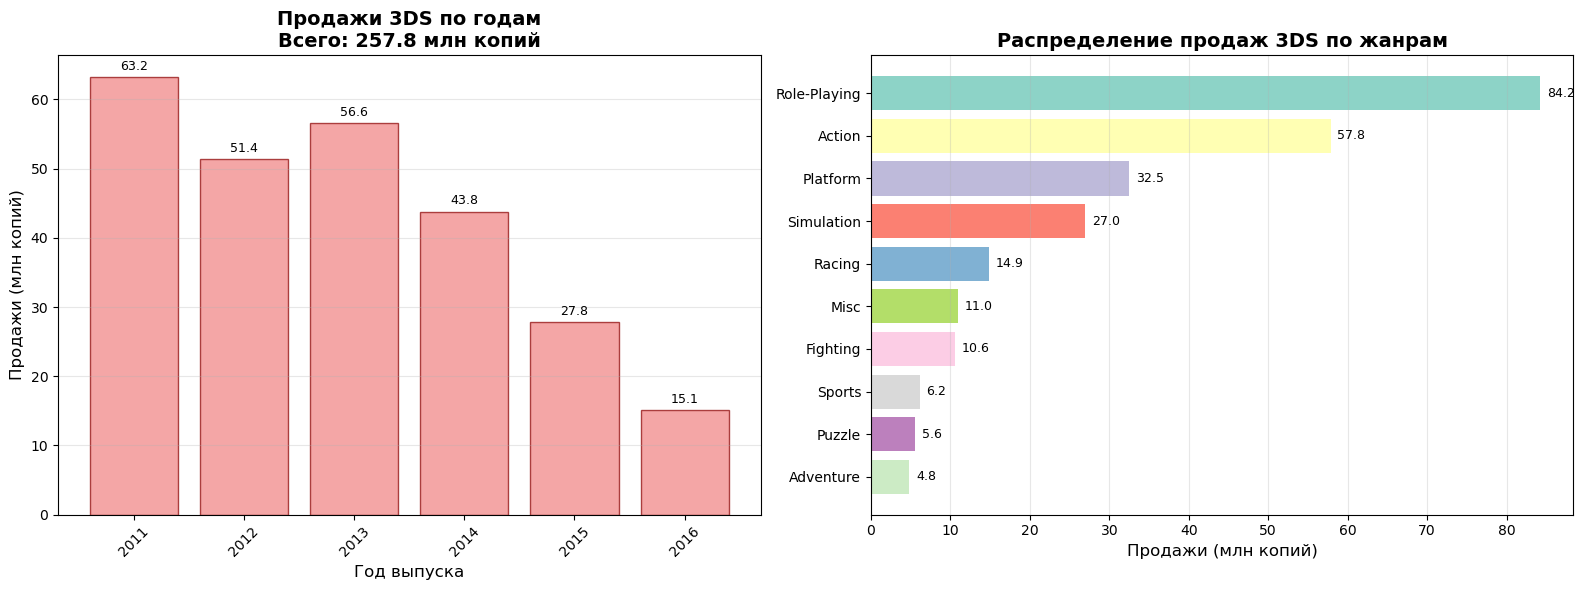

In [297]:
# Вариант Б: Создаем отдельные графики для каждой платформы с более детальной информацией
for platform in top_platforms[:10]:  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Фильтруем данные
    platform_data = df[df['platform'] == platform]
    
    if not platform_data.empty:
        # 1. График продаж по годам (основной)
        yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum().sort_index()
        
        # Левый график: столбчатая диаграмма с деталями
        bars = ax1.bar(yearly_sales.index, yearly_sales.values, 
                      color='lightcoral', edgecolor='darkred', alpha=0.7)
        
        # Добавляем подписи значений
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # показываем только ненулевые значения
                ax1.text(bar.get_x() + bar.get_width()/2., height + max(yearly_sales.values)*0.01,
                        f'{height:.1f}', ha='center', va='bottom', fontsize=9)
        
        ax1.set_title(f'Продажи {platform} по годам\nВсего: {yearly_sales.sum():.1f} млн копий', 
                     fontsize=14, fontweight='bold')
        ax1.set_xlabel('Год выпуска', fontsize=12)
        ax1.set_ylabel('Продажи (млн копий)', fontsize=12)
        ax1.grid(axis='y', alpha=0.3)
        ax1.tick_params(axis='x', rotation=45)
        
        # 2. Правый график: распределение продаж по жанрам для этой платформы
        genre_sales = platform_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
        
        # Ограничиваем топ-10 жанров для читаемости
        top_genres = genre_sales.head(10)
        
        colors = plt.cm.Set3(np.arange(len(top_genres)) / len(top_genres))
        ax2.barh(top_genres.index, top_genres.values, color=colors)
        ax2.set_title(f'Распределение продаж {platform} по жанрам', 
                     fontsize=14, fontweight='bold')
        ax2.set_xlabel('Продажи (млн копий)', fontsize=12)
        ax2.invert_yaxis()  # чтобы самый популярный жанр был сверху
        
        # Добавляем значения на барчарт
        for i, (genre, sales) in enumerate(top_genres.items()):
            ax2.text(sales + max(top_genres.values)*0.01, i, f'{sales:.1f}', 
                    va='center', fontsize=9)
        
        ax2.grid(axis='x', alpha=0.3)
    
    else:
        ax1.text(0.5, 0.5, 'Нет данных', ha='center', va='center', transform=ax1.transAxes)
        ax2.text(0.5, 0.5, 'Нет данных', ha='center', va='center', transform=ax2.transAxes)
    
    plt.tight_layout()
    plt.show()

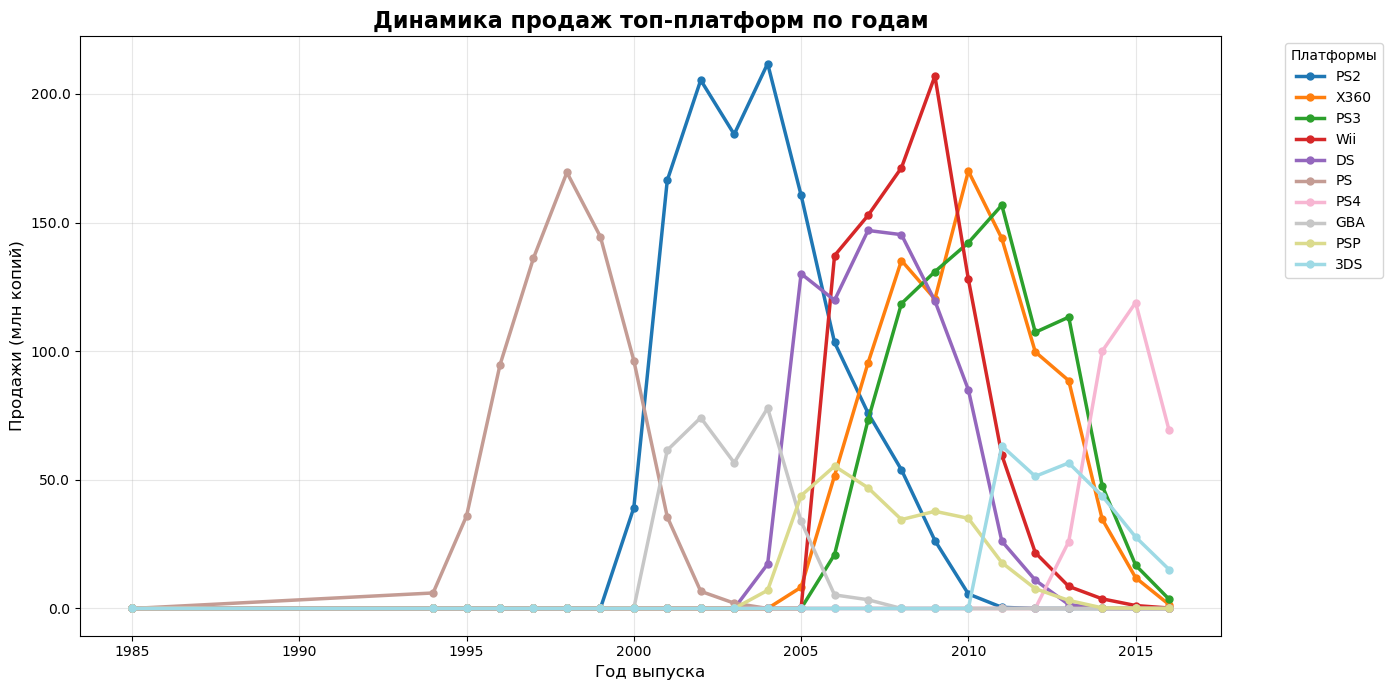

In [298]:
# Создаем таблицу: продажи по годам для топ-платформ
platform_sales_by_year = pd.pivot_table(
    df[df['platform'].isin(top_platforms)],  # только топ-платформы
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    fill_value=0
)

# График 2: Динамика продаж топ-платформ по годам (линейный)
fig, ax = plt.subplots(figsize=(14, 7))

# Цветовая палитра для платформ
colors = plt.cm.tab20(np.linspace(0, 1, len(top_platforms)))

for i, platform in enumerate(top_platforms):
    if platform in platform_sales_by_year.columns:
        ax.plot(platform_sales_by_year.index, 
                platform_sales_by_year[platform], 
                label=platform, 
                linewidth=2.5,
                marker='o',
                markersize=5,
                color=colors[i])

ax.set_title('Динамика продаж топ-платформ по годам', fontsize=16, fontweight='bold')
ax.set_xlabel('Год выпуска', fontsize=12)
ax.set_ylabel('Продажи (млн копий)', fontsize=12)
ax.legend(title='Платформы', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

# Автоматический формат оси Y (чтобы большие числа отображались нормально)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))

plt.tight_layout()
plt.show()

Анализ жизненного цикла топ-платформ:
      first_year  last_year  active_years  peak_year  peak_sales
DS          1985       2013            29       2007      146.94
PS          1994       2003            10       1998      169.49
PS2         2000       2011            12       2004      211.81
GBA         2000       2007             8       2004       77.91
PSP         2004       2015            12       2006       55.32
X360        2005       2016            12       2010      170.03
PS3         2006       2016            11       2011      156.78
Wii         2006       2016            11       2009      206.97
3DS         2011       2016             6       2011       63.20
PS4         2013       2016             4       2015      118.90


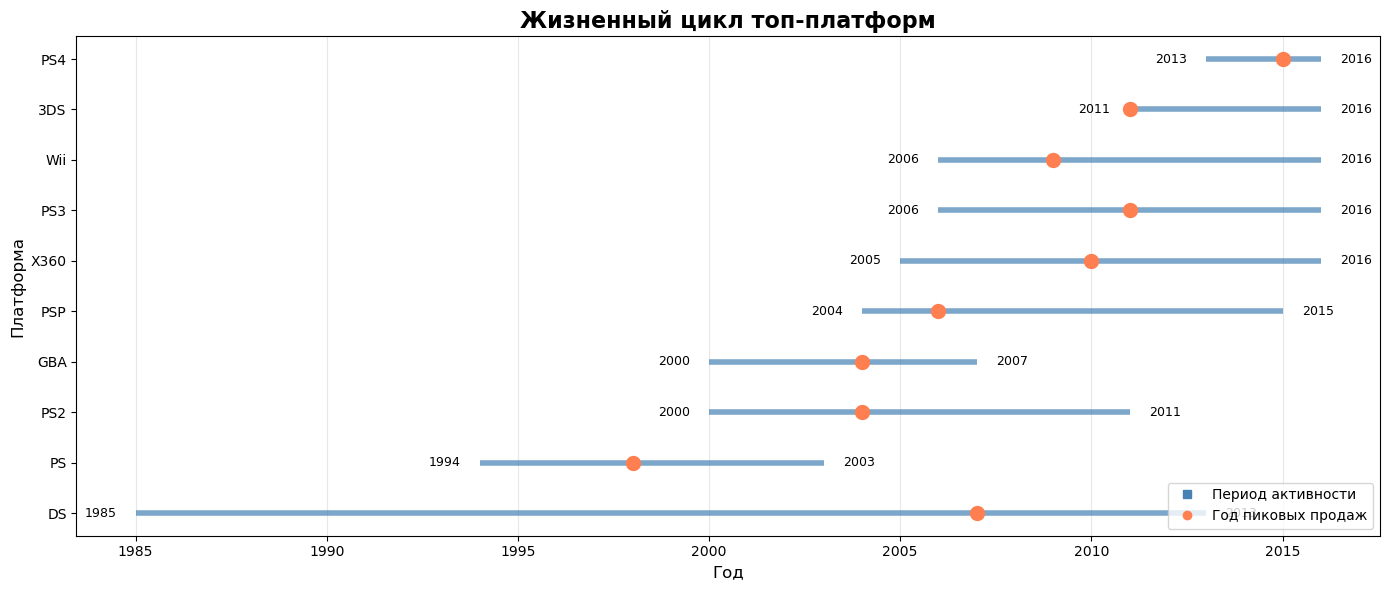


Средняя продолжительность жизни платформы: 11.5 лет
Медианная продолжительность: 11.0 лет
Минимальная продолжительность: 4 лет
Максимальная продолжительность: 29 лет


In [299]:
# Анализ жизненного цикла платформ
platform_lifecycle = {}

for platform in top_platforms:
    platform_data = df[df['platform'] == platform]
    if not platform_data.empty:
        first_year = platform_data['year_of_release'].min()
        last_year = platform_data['year_of_release'].max()
        active_years = last_year - first_year + 1
        peak_year = platform_data.groupby('year_of_release')['total_sales'].sum().idxmax()
        peak_sales = platform_data.groupby('year_of_release')['total_sales'].sum().max()
        
        platform_lifecycle[platform] = {
            'first_year': first_year,
            'last_year': last_year,
            'active_years': active_years,
            'peak_year': peak_year,
            'peak_sales': peak_sales
        }

# Создаем DataFrame для анализа
lifecycle_df = pd.DataFrame.from_dict(platform_lifecycle, orient='index')
lifecycle_df = lifecycle_df.sort_values('first_year')

print("Анализ жизненного цикла топ-платформ:")
print(lifecycle_df)

# График 4: Жизненный цикл платформ
fig, ax = plt.subplots(figsize=(14, 6))

# Горизонтальные линии для каждой платформы
for i, (platform, row) in enumerate(lifecycle_df.iterrows()):
    ax.hlines(y=platform, xmin=row['first_year'], xmax=row['last_year'], 
              linewidth=4, color='steelblue', alpha=0.7)
    # Точка пика продаж
    ax.plot(row['peak_year'], platform, 'o', markersize=10, color='coral')
    
    # Подписи
    ax.text(row['first_year'] - 0.5, platform, f"{int(row['first_year'])}", 
            va='center', ha='right', fontsize=9)
    ax.text(row['last_year'] + 0.5, platform, f"{int(row['last_year'])}", 
            va='center', ha='left', fontsize=9)

ax.set_title('Жизненный цикл топ-платформ', fontsize=16, fontweight='bold')
ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Платформа', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

# Легенда
ax.plot([], [], 's', color='steelblue', label='Период активности')
ax.plot([], [], 'o', color='coral', label='Год пиковых продаж')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Статистика по жизненному циклу
print(f"\nСредняя продолжительность жизни платформы: {lifecycle_df['active_years'].mean():.1f} лет")
print(f"Медианная продолжительность: {lifecycle_df['active_years'].median():.1f} лет")
print(f"Минимальная продолжительность: {lifecycle_df['active_years'].min()} лет")
print(f"Максимальная продолжительность: {lifecycle_df['active_years'].max()} лет")

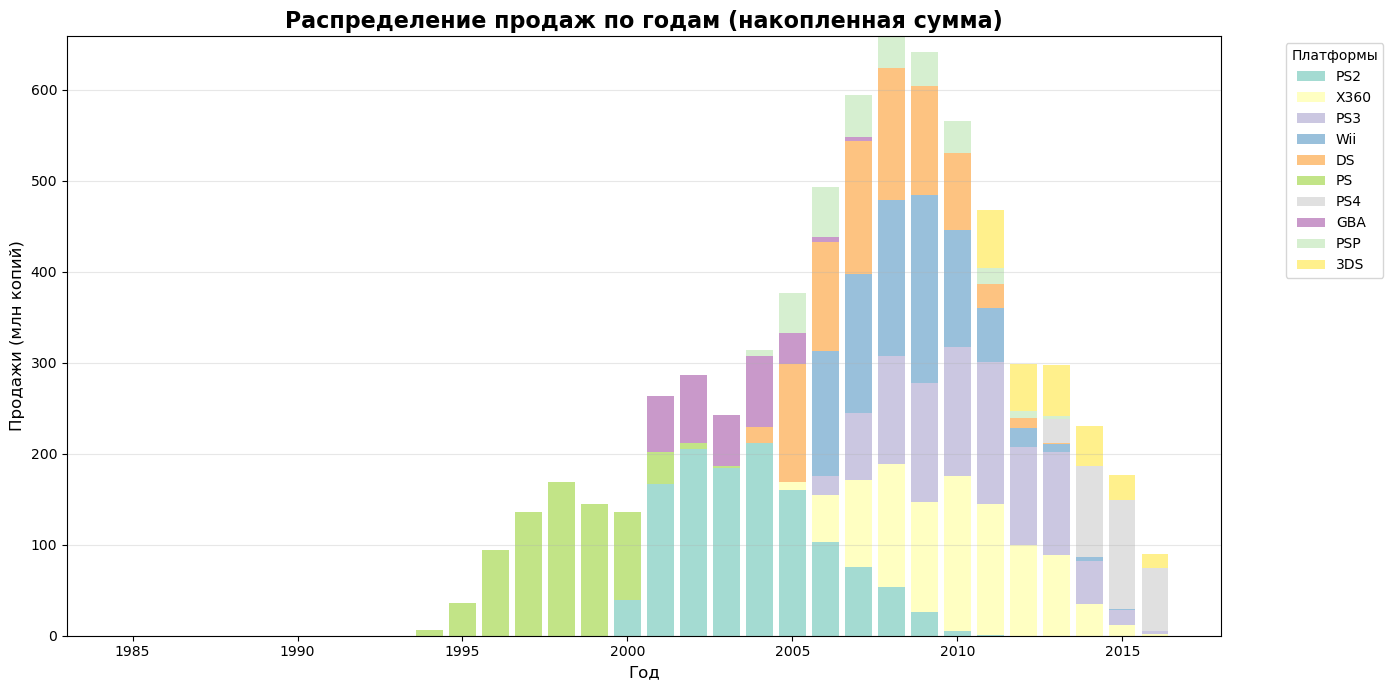

In [300]:
# График 5: Распределение продаж по годам для топ-платформ (stacked bar)
fig, ax = plt.subplots(figsize=(14, 7))

# Данные для stacked bar
stacked_data = platform_sales_by_year[top_platforms]

# Создаем stacked bar chart
bottom_vals = np.zeros(len(stacked_data))
colors = plt.cm.Set3(np.linspace(0, 1, len(top_platforms)))

for i, platform in enumerate(top_platforms):
    if platform in stacked_data.columns:
        ax.bar(stacked_data.index, stacked_data[platform], 
               bottom=bottom_vals, label=platform, color=colors[i], alpha=0.8)
        bottom_vals += stacked_data[platform].values

ax.set_title('Распределение продаж по годам (накопленная сумма)', fontsize=16, fontweight='bold')
ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Продажи (млн копий)', fontsize=12)
ax.legend(title='Платформы', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### ВЫВОД

In [301]:

print("=" * 60)
print("АНАЛИЗ ПЛАТФОРМ: ОТВЕТЫ НА ВОПРОСЫ")
print("=" * 60)

# 1. Платформы с наибольшими суммарными продажами
print(f"\n1. Топ-{top_n} платформ с наибольшими продажами:")
for i, (platform, sales) in enumerate(df_sales.head(top_n).iterrows(), 1):
    print(f"   {i:2}. {platform:10}: {sales['sum_total_sales']:.2f} млн копий")

# 2. Характерный срок жизни платформы
avg_lifecycle = lifecycle_df['active_years'].mean()
print(f"\n2. Характерный срок жизни платформы: {avg_lifecycle:.1f} лет")

# 3. Когда появляются новые платформы
yearly_new_platforms = df.groupby('year_of_release')['platform'].nunique()
peak_new_years = yearly_new_platforms.nlargest(3)
print(f"\n3. Годы с наибольшим количеством новых активных платформ:")
for year, count in peak_new_years.items():
    print(f"   {int(year)}: {count} активных платформ")

# 4. Когда исчезают старые платформы
# Находим последний год активности для каждой платформы
last_active_year = df.groupby('platform')['year_of_release'].max()
yearly_disappeared = last_active_year.value_counts().sort_index()
print(f"\n4. Годы, когда исчезали платформы (последний год активности):")
for year, count in yearly_disappeared.tail(5).items():
    platforms = last_active_year[last_active_year == year].index.tolist()
    print(f"   {int(year)}: исчезли {count} платформ ({', '.join(platforms[:3])}{'...' if len(platforms) > 3 else ''})")


АНАЛИЗ ПЛАТФОРМ: ОТВЕТЫ НА ВОПРОСЫ

1. Топ-10 платформ с наибольшими продажами:
    1. PS2       : 1233.56 млн копий
    2. X360      : 961.24 млн копий
    3. PS3       : 931.34 млн копий
    4. Wii       : 891.18 млн копий
    5. DS        : 802.78 млн копий
    6. PS        : 727.58 млн копий
    7. PS4       : 314.14 млн копий
    8. GBA       : 312.88 млн копий
    9. PSP       : 289.53 млн копий
   10. 3DS       : 257.81 млн копий

2. Характерный срок жизни платформы: 11.5 лет

3. Годы с наибольшим количеством новых активных платформ:
   2007: 11 активных платформ
   2013: 11 активных платформ
   1994: 10 активных платформ

4. Годы, когда исчезали платформы (последний год активности):
   2008: исчезли 2 платформ (DC, XB)
   2011: исчезли 1 платформ (PS2)
   2013: исчезли 1 платформ (DS)
   2015: исчезли 1 платформ (PSP)
   2016: исчезли 9 платформ (3DS, PC, PS3...)


#### Актуальный период

Актуальный период будет взят с 2013 года, так как появились все актуальные консоли

In [302]:
curr_period = df[df['year_of_release'] > 2013]
curr_period.info()
curr_period.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   int64  
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 171.5+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,NaN,None,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,NaN,None,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,NaN,None,7.98


#### Какие платформы лидируют по продажам, растут или падают?

In [303]:
curr_period_sales = pd.pivot_table(curr_period, index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
curr_period_sales = curr_period_sales.sort_values(by='total_sales', ascending=False)
curr_period_sales


total_sales
platform year_of_release             
PS4      2015                  118.90
         2014                  100.00
         2016                   69.25
XOne     2015                   60.14
         2014                   54.07
PS3      2014                   47.76
3DS      2014                   43.76
X360     2014                   34.74
3DS      2015                   27.78
XOne     2016                   26.15
WiiU     2014                   22.03
PS3      2015                   16.82
WiiU     2015                   16.35
3DS      2016                   15.14
PC       2014                   13.28
X360     2015                   11.96
PSV      2014                   11.90
PC       2015                    8.52
PSV      2015                    6.25
PC       2016                    5.25
WiiU     2016                    4.60
PSV      2016                    4.25
Wii      2014                    3.75
PS3      2016                    3.60
X360     2016                    1.52
Wii      2015                    1.14
PSP      2014                    0.24
Wii      2016                    0.18
PSP      2015                    0.12

In [304]:
curr_period_sales_platform = pd.pivot_table(curr_period, index='platform', values='total_sales', aggfunc='sum')
curr_period_sales_platform = curr_period_sales_platform.sort_values(by='total_sales', ascending=False)
curr_period_sales_platform


,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Выводы

1. Продажи почти всех консолей начали снижаться после 2014 года.
2. PS4 является лидером продаж, хотя в преддверии выхода PS5 продажи снижаются, она по-прежнему остаётся прибыльной платформой. Похожая ситуация и с XOne, которая имеет продажи в два раза меньше, но остаётся прибыльной.
3. Nintendo 3DS занимает третье место по продажам за рассматриваемый период. Это портативная консоль, и её конкуренты, такие как PSP, PSV, и WiiU, демонстрируют значительно меньшие продажи, поэтому Nintendo 3DS можно считать прибыльной платформой.
4. Продажи игр для PS3, X360, и Wii к концу актуального периода снизились до минимума. Эти консоли больше не актуальны и, следовательно, уже не являются прибыльными.
5. Оценка продаж игр на PC затруднена, так как платформу можно модернизировать и поддерживать в актуальном состоянии. Тем не менее, продажи остаются низкими, хотя, по моему мнению, эта платформа всегда будет актуальна.


#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

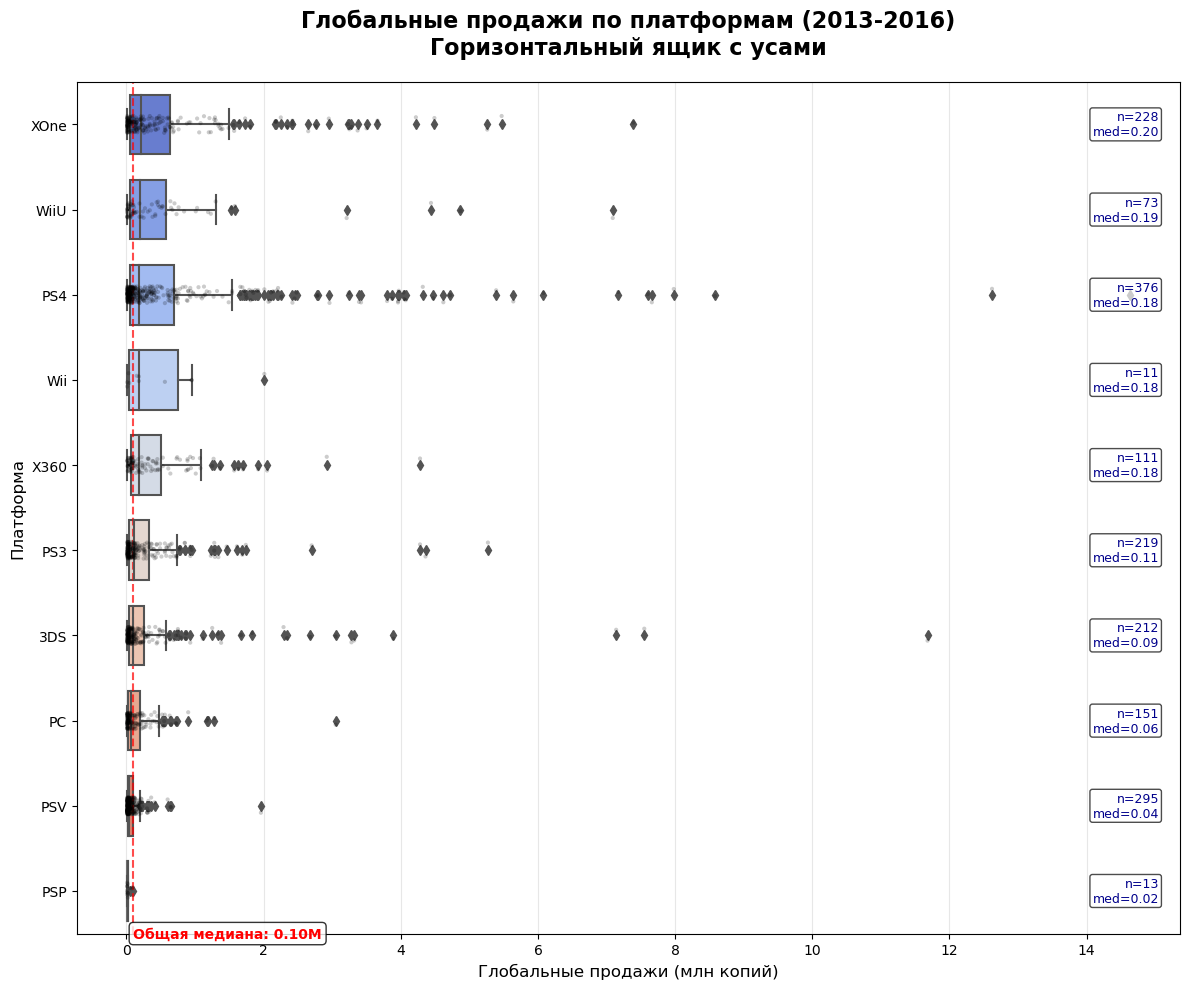

In [305]:
# Горизонтальный box plot (лучше читаются названия платформ)
fig, ax = plt.subplots(figsize=(12, 10))

platform_counts = curr_period['platform'].value_counts()
top_platforms = platform_counts.head(top_n).index.tolist()

# Выбираем топ-15 платформ
top_15_platforms = platform_counts.head(15).index.tolist()
filtered_df = curr_period[curr_period['platform'].isin(top_15_platforms)]

# Сортируем по медиане
platform_order = filtered_df.groupby('platform')['total_sales'].median().sort_values(ascending=False).index

# Горизонтальный box plot
sns.boxplot(data=filtered_df,
            y='platform',
            x='total_sales',
            order=platform_order,
            palette='coolwarm',
            showfliers=True,
            width=0.7,
            ax=ax)

# Добавляем точки для выбросов
sns.stripplot(data=filtered_df,
              y='platform',
              x='total_sales',
              order=platform_order,
              color='black',
              alpha=0.2,
              size=3,
              jitter=True,
              ax=ax)

# Вертикальная линия общей медианы
overall_median = curr_period['total_sales'].median()
ax.axvline(x=overall_median, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
ax.text(overall_median, len(platform_order)-0.5, f'Общая медиана: {overall_median:.2f}M', 
        color='red', ha='left', va='center', fontsize=10, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax.set_title('Глобальные продажи по платформам (2013-2016)\nГоризонтальный ящик с усами', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Глобальные продажи (млн копий)', fontsize=12)
ax.set_ylabel('Платформа', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Добавляем информацию о количестве игр
for i, platform in enumerate(platform_order):
    count = platform_counts[platform]
    median_val = filtered_df[filtered_df['platform'] == platform]['total_sales'].median()
    ax.text(ax.get_xlim()[1] * 0.98, i, f'n={count}\nmed={median_val:.2f}', 
            ha='right', va='center', fontsize=9, color='darkblue',
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7))

plt.tight_layout()
plt.show()

СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЛАТФОРМ (2013-2016)

Статистика по платформам (отсортировано по медиане):
Платформа  Кол-во игр  Медиана  Среднее  Q1 (25%)  Q3 (75%)  IQR  Мин  Макс  Стд. отклонение  Выбросы (>Q3+1.5*IQR)
     XOne         228     0.20     0.62      0.05      0.63 0.58 0.01  7.39             1.05                     25
     WiiU          73     0.19     0.59      0.05      0.57 0.52 0.01  7.09             1.16                      6
      PS4         376     0.18     0.77      0.06      0.69 0.63 0.01 14.63             1.61                     53
     X360         111     0.18     0.43      0.07      0.51 0.43 0.01  4.28             0.63                     10
      Wii          11     0.18     0.46      0.04      0.76 0.72 0.01  2.01             0.63                      1
      PS3         219     0.11     0.31      0.04      0.33 0.29 0.01  5.27             0.63                     20
      3DS         212     0.09     0.41      0.03      0.25 0.22 0.01 11.68             1.1

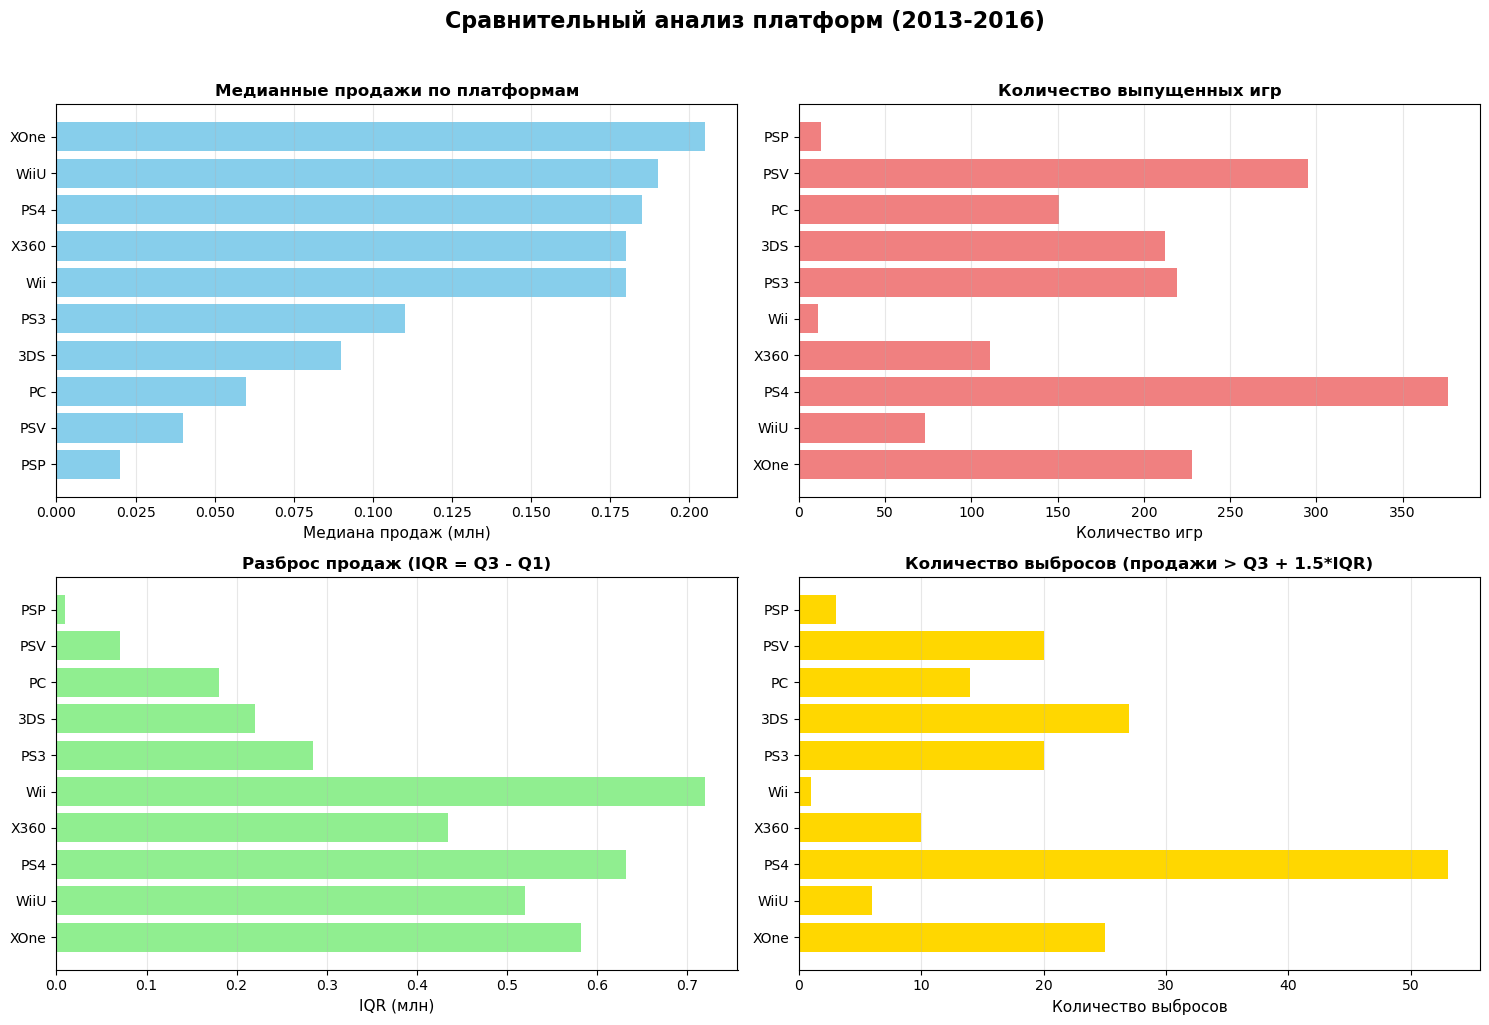

In [306]:
# Подробный статистический анализ для топ-платформ
print("=" * 80)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ ПЛАТФОРМ (2013-2016)")
print("=" * 80)

stats_list = []

for platform in top_platforms:
    platform_data = curr_period[curr_period['platform'] == platform]['total_sales']
    
    stats = {
        'Платформа': platform,
        'Кол-во игр': len(platform_data),
        'Медиана': platform_data.median(),
        'Среднее': platform_data.mean(),
        'Q1 (25%)': platform_data.quantile(0.25),
        'Q3 (75%)': platform_data.quantile(0.75),
        'IQR': platform_data.quantile(0.75) - platform_data.quantile(0.25),
        'Мин': platform_data.min(),
        'Макс': platform_data.max(),
        'Стд. отклонение': platform_data.std(),
        'Выбросы (>Q3+1.5*IQR)': len(platform_data[platform_data > platform_data.quantile(0.75) + 1.5*(platform_data.quantile(0.75) - platform_data.quantile(0.25))])
    }
    stats_list.append(stats)

# Создаем DataFrame с статистикой
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df.sort_values('Медиана', ascending=False)

print("\nСтатистика по платформам (отсортировано по медиане):")
print(stats_df.to_string(index=False, float_format=lambda x: f'{x:.2f}' if pd.notnull(x) else ''))

# Визуализация ключевых метрик
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# 1. Медианы продаж
axes[0].barh(stats_df['Платформа'], stats_df['Медиана'], color='skyblue')
axes[0].set_title('Медианные продажи по платформам', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Медиана продаж (млн)')
axes[0].invert_yaxis()

# 2. Количество игр
axes[1].barh(stats_df['Платформа'], stats_df['Кол-во игр'], color='lightcoral')
axes[1].set_title('Количество выпущенных игр', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Количество игр')

# 3. Разброс продаж (IQR)
axes[2].barh(stats_df['Платформа'], stats_df['IQR'], color='lightgreen')
axes[2].set_title('Разброс продаж (IQR = Q3 - Q1)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('IQR (млн)')

# 4. Выбросы
axes[3].barh(stats_df['Платформа'], stats_df['Выбросы (>Q3+1.5*IQR)'], color='gold')
axes[3].set_title('Количество выбросов (продажи > Q3 + 1.5*IQR)', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Количество выбросов')

for ax in axes:
    ax.grid(axis='x', alpha=0.3)

plt.suptitle('Сравнительный анализ платформ (2013-2016)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [307]:
print("=" * 80)
print("КЛЮЧЕВЫЕ ВЫВОДЫ ИЗ АНАЛИЗА ЯЩИКОВ С УСАМИ")
print("=" * 80)

# 1. Платформы с самыми высокими медианными продажами
top_median = stats_df.nlargest(3, 'Медиана')[['Платформа', 'Медиана', 'Кол-во игр']]
print("\n1. Платформы с самыми высокими медианными продажами:")
for _, row in top_median.iterrows():
    print(f"   • {row['Платформа']}: {row['Медиана']:.2f}M (игр: {row['Кол-во игр']})")

# 2. Платформы с самым большим разбросом (IQR)
top_iqr = stats_df.nlargest(3, 'IQR')[['Платформа', 'IQR', 'Медиана']]
print("\n2. Платформы с наибольшим разбросом продаж:")
for _, row in top_iqr.iterrows():
    print(f"   • {row['Платформа']}: IQR={row['IQR']:.2f}M (медиана: {row['Медиана']:.2f}M)")

# 3. Платформы с наибольшим количеством выбросов
top_outliers = stats_df.nlargest(3, 'Выбросы (>Q3+1.5*IQR)')[['Платформа', 'Выбросы (>Q3+1.5*IQR)', 'Кол-во игр']]
print("\n3. Платформы с наибольшим количеством хитов (выбросов):")
for _, row in top_outliers.iterrows():
    print(f"   • {row['Платформа']}: {row['Выбросы (>Q3+1.5*IQR)']} хитов из {row['Кол-во игр']} игр")


КЛЮЧЕВЫЕ ВЫВОДЫ ИЗ АНАЛИЗА ЯЩИКОВ С УСАМИ

1. Платформы с самыми высокими медианными продажами:
   • XOne: 0.20M (игр: 228)
   • WiiU: 0.19M (игр: 73)
   • PS4: 0.18M (игр: 376)

2. Платформы с наибольшим разбросом продаж:
   • Wii: IQR=0.72M (медиана: 0.18M)
   • PS4: IQR=0.63M (медиана: 0.18M)
   • XOne: IQR=0.58M (медиана: 0.20M)

3. Платформы с наибольшим количеством хитов (выбросов):
   • PS4: 53 хитов из 376 игр
   • 3DS: 27 хитов из 212 игр
   • XOne: 25 хитов из 228 игр


#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [308]:

sns.set_palette("husl")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (14, 6)

# Используем df_curr
df_curr = curr_period.copy()
target_platforms = ['XOne', 'PS4', 'X360']

# Цвета для платформ
platform_colors = {
    'XOne': '#E74C3C',  # Красный (яркий)
    'PS4': '#3498DB',   # Синий 
    'X360': '#2ECC71'   # Зелёный
}

print("=" * 70)
print("АНАЛИЗ КОРРЕЛЯЦИИ МЕЖДУ ОЦЕНКАМИ И ПРОДАЖАМИ")
print("Период: 2013-2016 | Платформы: XOne, PS4, X360")
print("=" * 70)

АНАЛИЗ КОРРЕЛЯЦИИ МЕЖДУ ОЦЕНКАМИ И ПРОДАЖАМИ
Период: 2013-2016 | Платформы: XOne, PS4, X360


In [309]:
def calculate_platform_stats(platform_data, platform_name):
    """Рассчитывает статистику для платформы"""
    
    # User Score данные
    user_data = platform_data[platform_data['user_score'].notna()].copy()
    user_stats = {
        'count': len(user_data),
        'mean_score': user_data['user_score'].mean() if len(user_data) > 0 else None,
        'mean_sales': user_data['total_sales'].mean() if len(user_data) > 0 else None,
        'corr_pearson': None,
        'corr_spearman': None,
        'p_value': None
    }
    
    if len(user_data) > 1:
        user_stats['corr_pearson'] = user_data['user_score'].corr(user_data['total_sales'])
        user_stats['corr_spearman'] = user_data['user_score'].corr(user_data['total_sales'], method='spearman')
        try:
            _, user_stats['p_value'] = stats.pearsonr(user_data['user_score'], user_data['total_sales'])
        except:
            user_stats['p_value'] = None
    
    # Critic Score данные
    critic_data = platform_data[platform_data['critic_score'] != -1].copy()
    critic_stats = {
        'count': len(critic_data),
        'mean_score': critic_data['critic_score'].mean() if len(critic_data) > 0 else None,
        'mean_sales': critic_data['total_sales'].mean() if len(critic_data) > 0 else None,
        'corr_pearson': None,
        'corr_spearman': None,
        'p_value': None
    }
    
    if len(critic_data) > 1:
        critic_stats['corr_pearson'] = critic_data['critic_score'].corr(critic_data['total_sales'])
        critic_stats['corr_spearman'] = critic_data['critic_score'].corr(critic_data['total_sales'], method='spearman')
        try:
            _, critic_stats['p_value'] = stats.pearsonr(critic_data['critic_score'], critic_data['total_sales'])
        except:
            critic_stats['p_value'] = None
    
    return {
        'platform': platform_name,
        'user': user_stats,
        'critic': critic_stats
    }


АНАЛИЗ ДЛЯ ПЛАТФОРМЫ: XOne


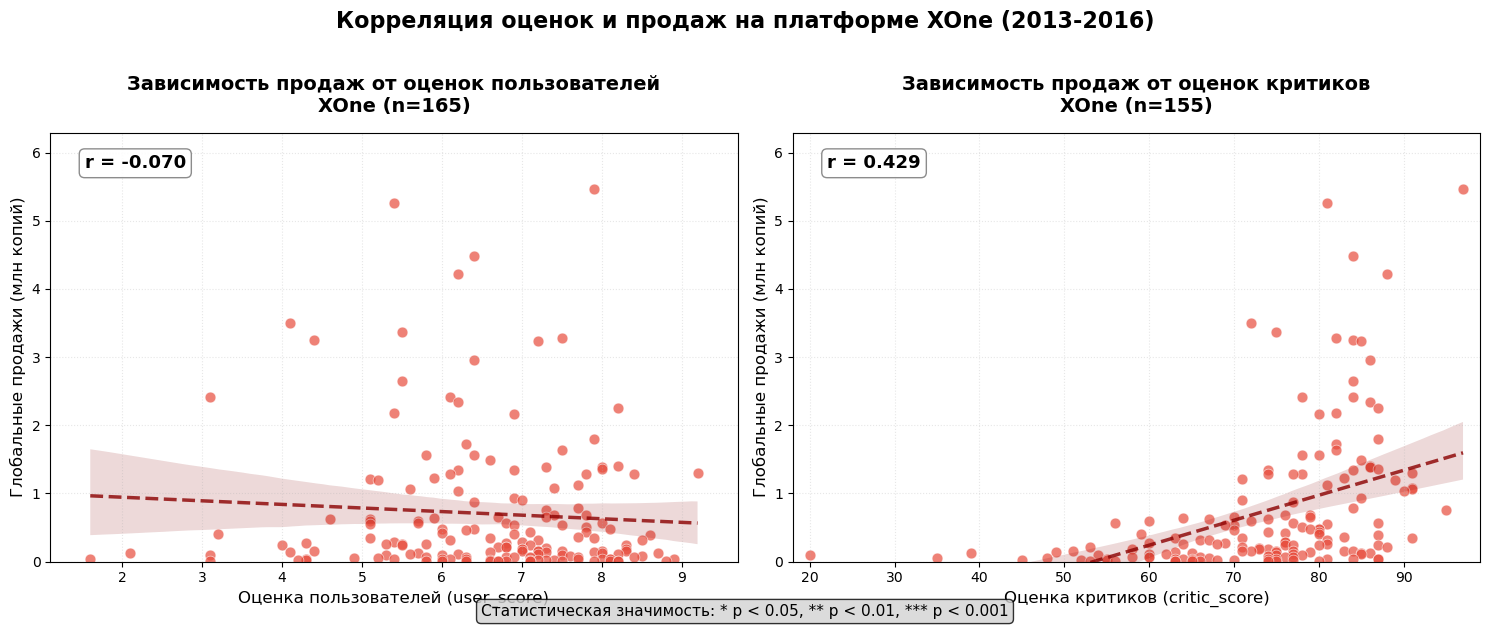


 ПОДРОБНАЯ СТАТИСТИКА ДЛЯ XOne:
--------------------------------------------------

 ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ (user_score):
   • Количество игр: 165
   • Средняя оценка: 6.59
   • Средние продажи: 0.70 млн копий
   • Корреляция Пирсона: -0.070 (слабая отрицательная)
   • Корреляция Спирмена: -0.076

 ОЦЕНКИ КРИТИКОВ (critic_score):
   • Количество игр: 155
   • Средняя оценка: 73.79
   • Средние продажи: 0.75 млн копий
   • Корреляция Пирсона: 0.429 (умеренная положительная)
   • Корреляция Спирмена: 0.545
--------------------------------------------------

АНАЛИЗ ДЛЯ ПЛАТФОРМЫ: PS4


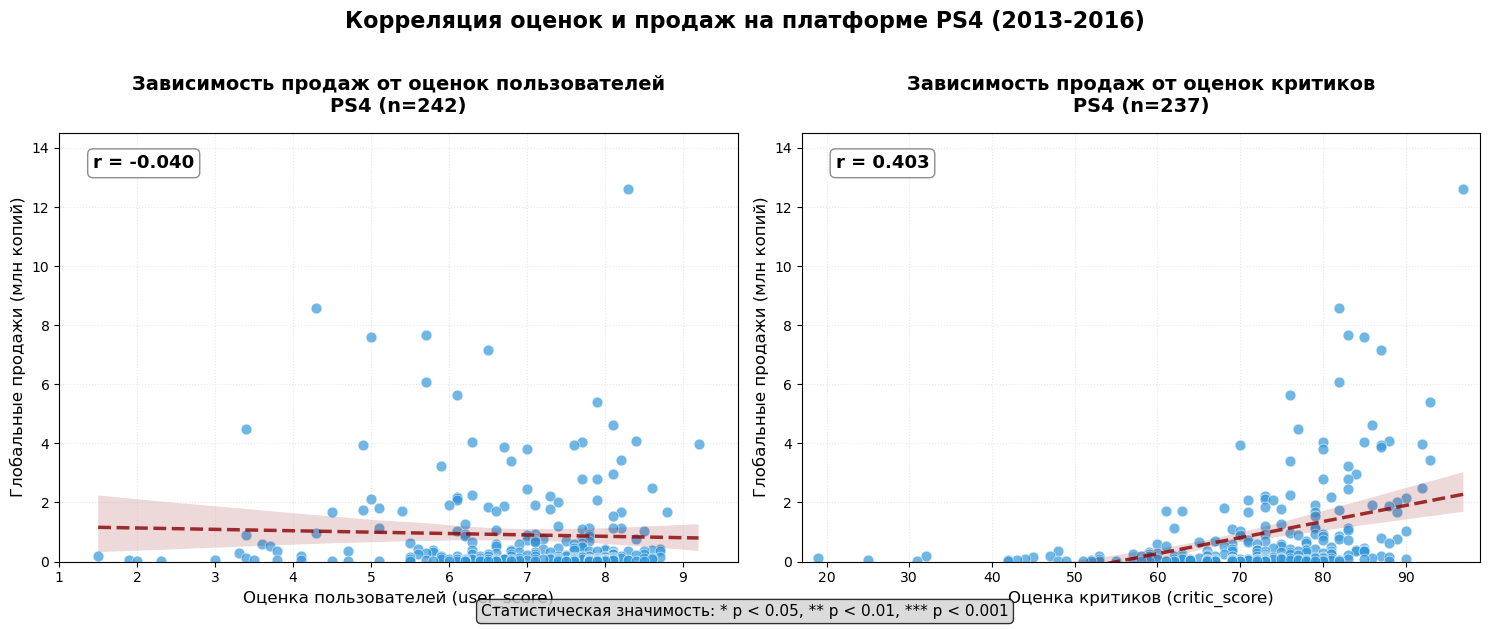


 ПОДРОБНАЯ СТАТИСТИКА ДЛЯ PS4:
--------------------------------------------------

 ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ (user_score):
   • Количество игр: 242
   • Средняя оценка: 6.83
   • Средние продажи: 0.91 млн копий
   • Корреляция Пирсона: -0.040 (слабая отрицательная)
   • Корреляция Спирмена: -0.005

 ОЦЕНКИ КРИТИКОВ (critic_score):
   • Количество игр: 237
   • Средняя оценка: 72.16
   • Средние продажи: 0.93 млн копий
   • Корреляция Пирсона: 0.403 (умеренная положительная)
   • Корреляция Спирмена: 0.504
--------------------------------------------------

АНАЛИЗ ДЛЯ ПЛАТФОРМЫ: X360


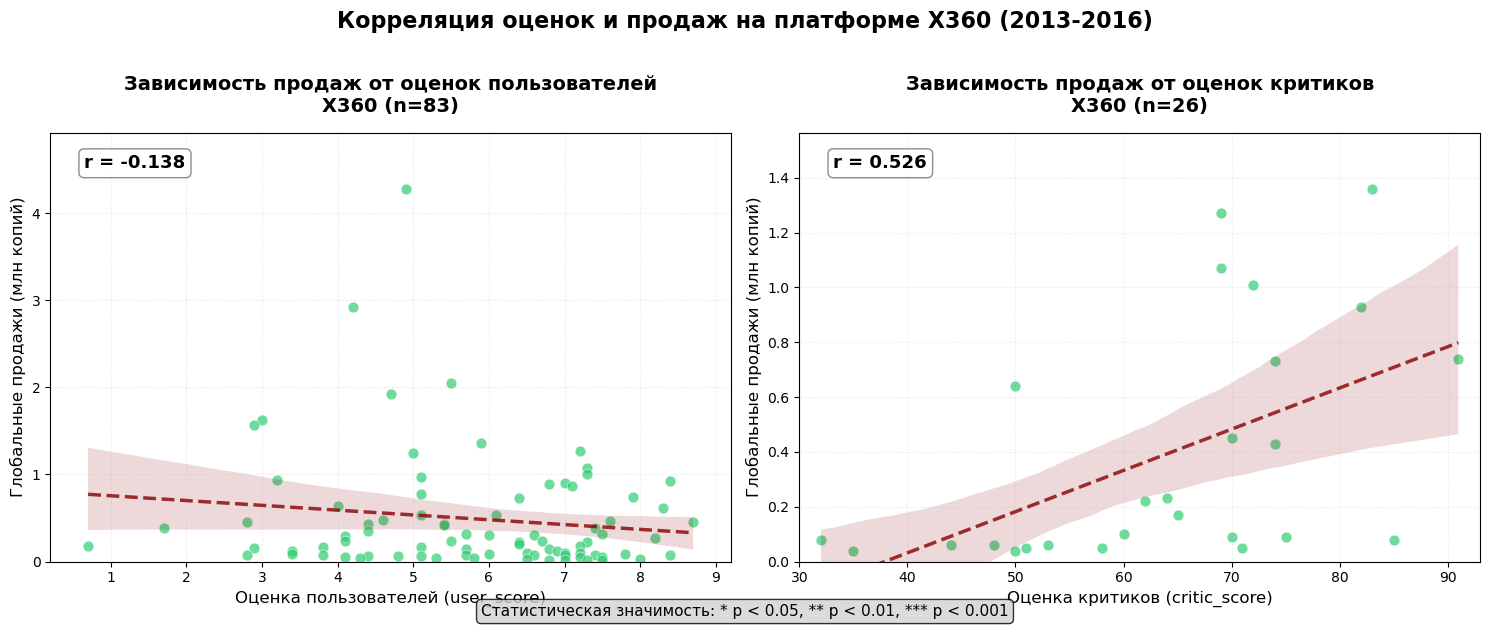


 ПОДРОБНАЯ СТАТИСТИКА ДЛЯ X360:
--------------------------------------------------

 ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ (user_score):
   • Количество игр: 83
   • Средняя оценка: 5.77
   • Средние продажи: 0.49 млн копий
   • Корреляция Пирсона: -0.138 (слабая отрицательная)
   • Корреляция Спирмена: -0.117

 ОЦЕНКИ КРИТИКОВ (critic_score):
   • Количество игр: 26
   • Средняя оценка: 63.73
   • Средние продажи: 0.39 млн копий
   • Корреляция Пирсона: 0.526 (умеренная положительная)
   • Корреляция Спирмена: 0.580
--------------------------------------------------


In [310]:
# Создаём графики для каждой платформы
all_stats = []

for platform in target_platforms:
    print(f"\n{'='*70}")
    print(f"АНАЛИЗ ДЛЯ ПЛАТФОРМЫ: {platform}")
    print(f"{'='*70}")
    
    # Фильтруем данные для платформы
    platform_data = df_curr[df_curr['platform'] == platform].copy()
    
    # Рассчитываем статистику
    stats_dict = calculate_platform_stats(platform_data, platform)
    all_stats.append(stats_dict)
    
    # Создаём рисунок с двумя графиками
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    color = platform_colors[platform]
    
    # 1. ЛЕВЫЙ ГРАФИК: User Score с Seaborn
    ax = axes[0]
    user_data = platform_data[platform_data['user_score'].notna()]
    
    if len(user_data) > 1:
        # Scatter plot с линией регрессии от Seaborn
        sns.regplot(x='user_score', y='total_sales', data=user_data,
                   scatter_kws={'alpha': 0.7, 's': 60, 'color': color, 'edgecolor': 'white', 'linewidth': 0.5},
                   line_kws={'color': 'darkred', 'linewidth': 2.5, 'linestyle': '--', 'alpha': 0.8},
                   ci=95,  # 95% доверительный интервал
                   ax=ax)
        
        # Добавляем аннотацию с корреляцией
        if stats_dict['user']['corr_pearson'] is not None:
            corr = stats_dict['user']['corr_pearson']
            p_val = stats_dict['user']['p_value']
            
            # Определяем значимость
            stars = ''
            if p_val and p_val < 0.001:
                stars = '***'
            elif p_val and p_val < 0.01:
                stars = '**'
            elif p_val and p_val < 0.05:
                stars = '*'
            
            # Текст аннотации
            corr_text = f'r = {corr:.3f}{stars}'
            ax.text(0.05, 0.95, corr_text, transform=ax.transAxes,
                   fontsize=13, fontweight='bold', verticalalignment='top',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9, edgecolor='gray'))
    
    # Настройки графика User Score
    ax.set_title(f'Зависимость продаж от оценок пользователей\n{platform} (n={len(user_data)})', 
                fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Оценка пользователей (user_score)', fontsize=12)
    ax.set_ylabel('Глобальные продажи (млн копий)', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle=':')
    
    # Устанавливаем красивые границы
    if len(user_data) > 0:
        ax.set_xlim(left=user_data['user_score'].min() - 0.5, 
                   right=user_data['user_score'].max() + 0.5)
        ax.set_ylim(bottom=0, top=user_data['total_sales'].max() * 1.15)
    
    # 2. ПРАВЫЙ ГРАФИК: Critic Score с Seaborn
    ax = axes[1]
    critic_data = platform_data[platform_data['critic_score'] != -1]
    
    if len(critic_data) > 1:
        # Scatter plot с линией регрессии от Seaborn
        sns.regplot(x='critic_score', y='total_sales', data=critic_data,
                   scatter_kws={'alpha': 0.7, 's': 60, 'color': color, 'edgecolor': 'white', 'linewidth': 0.5},
                   line_kws={'color': 'darkred', 'linewidth': 2.5, 'linestyle': '--', 'alpha': 0.8},
                   ci=95,  # 95% доверительный интервал
                   ax=ax)
        
        # Добавляем аннотацию с корреляцией
        if stats_dict['critic']['corr_pearson'] is not None:
            corr = stats_dict['critic']['corr_pearson']
            p_val = stats_dict['critic']['p_value']
            
            # Определяем значимость
            stars = ''
            if p_val and p_val < 0.001:
                stars = '***'
            elif p_val and p_val < 0.01:
                stars = '**'
            elif p_val and p_val < 0.05:
                stars = '*'
            
            # Текст аннотации
            corr_text = f'r = {corr:.3f}{stars}'
            ax.text(0.05, 0.95, corr_text, transform=ax.transAxes,
                   fontsize=13, fontweight='bold', verticalalignment='top',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9, edgecolor='gray'))
    
    # Настройки графика Critic Score
    ax.set_title(f'Зависимость продаж от оценок критиков\n{platform} (n={len(critic_data)})', 
                fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Оценка критиков (critic_score)', fontsize=12)
    ax.set_ylabel('Глобальные продажи (млн копий)', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle=':')
    
    # Устанавливаем красивые границы
    if len(critic_data) > 0:
        ax.set_xlim(left=critic_data['critic_score'].min() - 2, 
                   right=critic_data['critic_score'].max() + 2)
        ax.set_ylim(bottom=0, top=critic_data['total_sales'].max() * 1.15)
    
    # ОБЩИЙ ЗАГОЛОВОК РИСУНКА
    fig.suptitle(f'Корреляция оценок и продаж на платформе {platform} (2013-2016)', 
                fontsize=16, fontweight='bold', y=1.02)
    
    # Легенда статистической значимости внизу
    sig_text = "Статистическая значимость: * p < 0.05, ** p < 0.01, *** p < 0.001"
    fig.text(0.5, 0.01, sig_text, ha='center', fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # ВЫВОДИМ ПОДРОБНУЮ СТАТИСТИКУ ПОСЛЕ ГРАФИКОВ
    print(f"\n ПОДРОБНАЯ СТАТИСТИКА ДЛЯ {platform}:")
    print("-" * 50)
    
    print(f"\n ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ (user_score):")
    print(f"   • Количество игр: {stats_dict['user']['count']}")
    if stats_dict['user']['mean_score'] is not None:
        print(f"   • Средняя оценка: {stats_dict['user']['mean_score']:.2f}")
    if stats_dict['user']['mean_sales'] is not None:
        print(f"   • Средние продажи: {stats_dict['user']['mean_sales']:.2f} млн копий")
    if stats_dict['user']['corr_pearson'] is not None:
        # Интерпретация корреляции
        corr_val = abs(stats_dict['user']['corr_pearson'])
        if corr_val > 0.7:
            strength = "сильная"
        elif corr_val > 0.3:
            strength = "умеренная"
        else:
            strength = "слабая"
        
        direction = "положительная" if stats_dict['user']['corr_pearson'] > 0 else "отрицательная"
        
        print(f"   • Корреляция Пирсона: {stats_dict['user']['corr_pearson']:.3f} ({strength} {direction})")
        print(f"   • Корреляция Спирмена: {stats_dict['user']['corr_spearman']:.3f}")
        
        if stats_dict['user']['p_value'] is not None:
            if stats_dict['user']['p_value'] < 0.05:
                print(f"    Статистически значима! (p = {stats_dict['user']['p_value']:.4f})")
            else:
                print(f"    Не статистически значима (p = {stats_dict['user']['p_value']:.4f})")
    
    print(f"\n ОЦЕНКИ КРИТИКОВ (critic_score):")
    print(f"   • Количество игр: {stats_dict['critic']['count']}")
    if stats_dict['critic']['mean_score'] is not None:
        print(f"   • Средняя оценка: {stats_dict['critic']['mean_score']:.2f}")
    if stats_dict['critic']['mean_sales'] is not None:
        print(f"   • Средние продажи: {stats_dict['critic']['mean_sales']:.2f} млн копий")
    if stats_dict['critic']['corr_pearson'] is not None:
        # Интерпретация корреляции
        corr_val = abs(stats_dict['critic']['corr_pearson'])
        if corr_val > 0.7:
            strength = "сильная"
        elif corr_val > 0.3:
            strength = "умеренная"
        else:
            strength = "слабая"
        
        direction = "положительная" if stats_dict['critic']['corr_pearson'] > 0 else "отрицательная"
        
        print(f"   • Корреляция Пирсона: {stats_dict['critic']['corr_pearson']:.3f} ({strength} {direction})")
        print(f"   • Корреляция Спирмена: {stats_dict['critic']['corr_spearman']:.3f}")
        
        if stats_dict['critic']['p_value'] is not None:
            if stats_dict['critic']['p_value'] < 0.05:
                print(f"    Статистически значима! (p = {stats_dict['critic']['p_value']:.4f})")
            else:
                print(f"    Не статистически значима (p = {stats_dict['critic']['p_value']:.4f})")
    
    print("-" * 50)

In [311]:
print("\n" + "="*80)
print("ИТОГОВАЯ СВОДНАЯ ТАБЛИЦА ПО ВСЕМ ПЛАТФОРМАМ")
print("="*80)

# Создаём красивую таблицу
summary_data = []

for stats in all_stats:
    platform = stats['platform']
    
    # User stats
    user_corr = stats['user']['corr_pearson']
    user_p = stats['user']['p_value']
    user_sig = ''
    if user_p and user_p < 0.001:
        user_sig = '***'
    elif user_p and user_p < 0.01:
        user_sig = '**'
    elif user_p and user_p < 0.05:
        user_sig = '*'
    
    # Critic stats
    critic_corr = stats['critic']['corr_pearson']
    critic_p = stats['critic']['p_value']
    critic_sig = ''
    if critic_p and critic_p < 0.001:
        critic_sig = '***'
    elif critic_p and critic_p < 0.01:
        critic_sig = '**'
    elif critic_p and critic_p < 0.05:
        critic_sig = '*'
    
    summary_data.append({
        'Платформа': platform,
        'Игр (user)': stats['user']['count'],
        'Игр (critic)': stats['critic']['count'],
        'User corr': f"{user_corr:.3f}{user_sig}" if user_corr is not None else "N/A",
        'Critic corr': f"{critic_corr:.3f}{critic_sig}" if critic_corr is not None else "N/A",
        'User sales (avg)': f"{stats['user']['mean_sales']:.2f}M" if stats['user']['mean_sales'] else "N/A",
        'Critic sales (avg)': f"{stats['critic']['mean_sales']:.2f}M" if stats['critic']['mean_sales'] else "N/A"
    })

# Выводим таблицу
print("\n" + "-"*100)
print(f"{'Платформа':<10} {'Игр(user)':<12} {'Игр(critic)':<12} {'User corr':<12} {'Critic corr':<12} {'User sales':<15} {'Critic sales':<15}")
print("-"*100)

for row in summary_data:
    print(f"{row['Платформа']:<10} {row['Игр (user)']:<12} {row['Игр (critic)']:<12} "
          f"{row['User corr']:<12} {row['Critic corr']:<12} {row['User sales (avg)']:<15} {row['Critic sales (avg)']:<15}")

print("-"*100)
print("* p < 0.05, ** p < 0.01, *** p < 0.001")

# ВЫВОДИМ КЛЮЧЕВЫЕ ИНСАЙТЫ
print("\n" + "="*80)
print("КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("="*80)

for stats in all_stats:
    platform = stats['platform']
    print(f"\n {platform}:")
    
    # Сравниваем user и critic корреляции
    user_corr = stats['user']['corr_pearson']
    critic_corr = stats['critic']['corr_pearson']
    
    if user_corr is not None and critic_corr is not None:
        if abs(critic_corr) > abs(user_corr):
            print(f"   • Оценки критиков сильнее связаны с продажами, чем оценки пользователей")
            print(f"     (critic: {critic_corr:.3f} vs user: {user_corr:.3f})")
        else:
            print(f"   • Оценки пользователей сильнее связаны с продажами, чем оценки критиков")
            print(f"     (user: {user_corr:.3f} vs critic: {critic_corr:.3f})")
    
    # Проверяем статистическую значимость
    user_sig = stats['user']['p_value'] and stats['user']['p_value'] < 0.05
    critic_sig = stats['critic']['p_value'] and stats['critic']['p_value'] < 0.05
    
    if user_sig and critic_sig:
        print(f"   • Обе корреляции статистически значимы (p < 0.05)")
    elif user_sig:
        print(f"   • Только корреляция с user_score статистически значима")
    elif critic_sig:
        print(f"   • Только корреляция с critic_score статистически значима")
    else:
        print(f"   • Ни одна из корреляций не статистически значима")




ИТОГОВАЯ СВОДНАЯ ТАБЛИЦА ПО ВСЕМ ПЛАТФОРМАМ

----------------------------------------------------------------------------------------------------
Платформа  Игр(user)    Игр(critic)  User corr    Critic corr  User sales      Critic sales   
----------------------------------------------------------------------------------------------------
XOne       165          155          -0.070       0.429        0.70M           0.75M          
PS4        242          237          -0.040       0.403        0.91M           0.93M          
X360       83           26           -0.138       0.526        0.49M           0.39M          
----------------------------------------------------------------------------------------------------
* p < 0.05, ** p < 0.01, *** p < 0.001

КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

 XOne:
   • Оценки критиков сильнее связаны с продажами, чем оценки пользователей
     (critic: 0.429 vs user: -0.070)
   • Ни одна из корреляций не статистически значима

 PS4:
   • Оценки критиков 

На основе предоставленных коэффициентов корреляции можно сделать следующие заключения:

Корреляция между отзывами пользователей и продажами (-0.0703839280647581):

- Это значение практически равно нулю, указывая на отсутствие существенной линейной связи.
- Небольшая отрицательная корреляция свидетельствует о возможной слабой тенденции, при которой ухудшение отзывов пользователей может незначительно снижать продажи, но в рамках данной выборки это влияние практически незаметно.

Корреляция между отзывами критиков и продажами (0.42867694370333226):

- Это значение указывает на умеренную положительную корреляцию, предполагая, что существует определенная положительная связь между отзывами критиков и продажами игр.
- Интерпретация данных: Отзывы критиков оказывают более заметное влияние на продажи по сравнению с отзывами пользователей, хотя они все же не являются единственным решающим фактором. Вероятно, покупатели ориентируются на мнения критиков при принятии решений о покупке, хотя важны и другие факторы.
- Возможные причины: Умеренная связь может указывать на то, что положительные рецензии критиков способны привлечь внимание к игре и стимулировать продажи, но для достижения высоких продаж необходимо учитывать другие элементы, такие как успешные маркетинговые кампании, качественный контент и механика игры, узнаваемость бренда и так далее.

Общий вывод:

- Дополнительные факторы: Обе категории отзывов влияют на продажи, но их влияние не является сильным. Это подтверждает необходимость учитывать множество других факторов при анализе успеха игры.
- Рекомендации: Разработчики и маркетологи должны акцентировать внимание на отзывах критиков, так как они имеют большее влияние на продажи, но также следует применять комплексный подход, включая качественное выполнение игр, эффективный маркетинг и взаимодействие с игроками.

В конечном итоге, отзывы критиков играют более важную роль в определении уровня продаж, чем отзывы пользователей, однако ни один из этих факторов не является окончательным. Для повышения продаж следует учитывать разнообразные влияющие переменные.

#### Посмотрите на общее распределение игр по жанрам.

In [312]:
sns.set_palette("husl")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (14, 8)

# Используем df_curr (данные 2013-2016)
df_curr = curr_period.copy()

print("=" * 80)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ ИГР ПО ЖАНРАМ (2013-2016)")
print("=" * 80)

# 1.1. Общая статистика по жанрам
genre_counts = df_curr['genre'].value_counts()
genre_sales = df_curr.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print(f"\n ОБЩАЯ СТАТИСТИКА:")
print(f"Всего игр в анализе: {len(df_curr)}")
print(f"Количество уникальных жанров: {df_curr['genre'].nunique()}")
print(f"\nТоп-5 жанров по количеству игр:")
for i, (genre, count) in enumerate(genre_counts.head(5).items(), 1):
    print(f"  {i}. {genre}: {count} игр ({count/len(df_curr)*100:.1f}%)")

АНАЛИЗ РАСПРЕДЕЛЕНИЯ ИГР ПО ЖАНРАМ (2013-2016)

 ОБЩАЯ СТАТИСТИКА:
Всего игр в анализе: 1689
Количество уникальных жанров: 12

Топ-5 жанров по количеству игр:
  1. Action: 619 игр (36.6%)
  2. Role-Playing: 221 игр (13.1%)
  3. Adventure: 185 игр (11.0%)
  4. Sports: 161 игр (9.5%)
  5. Shooter: 128 игр (7.6%)


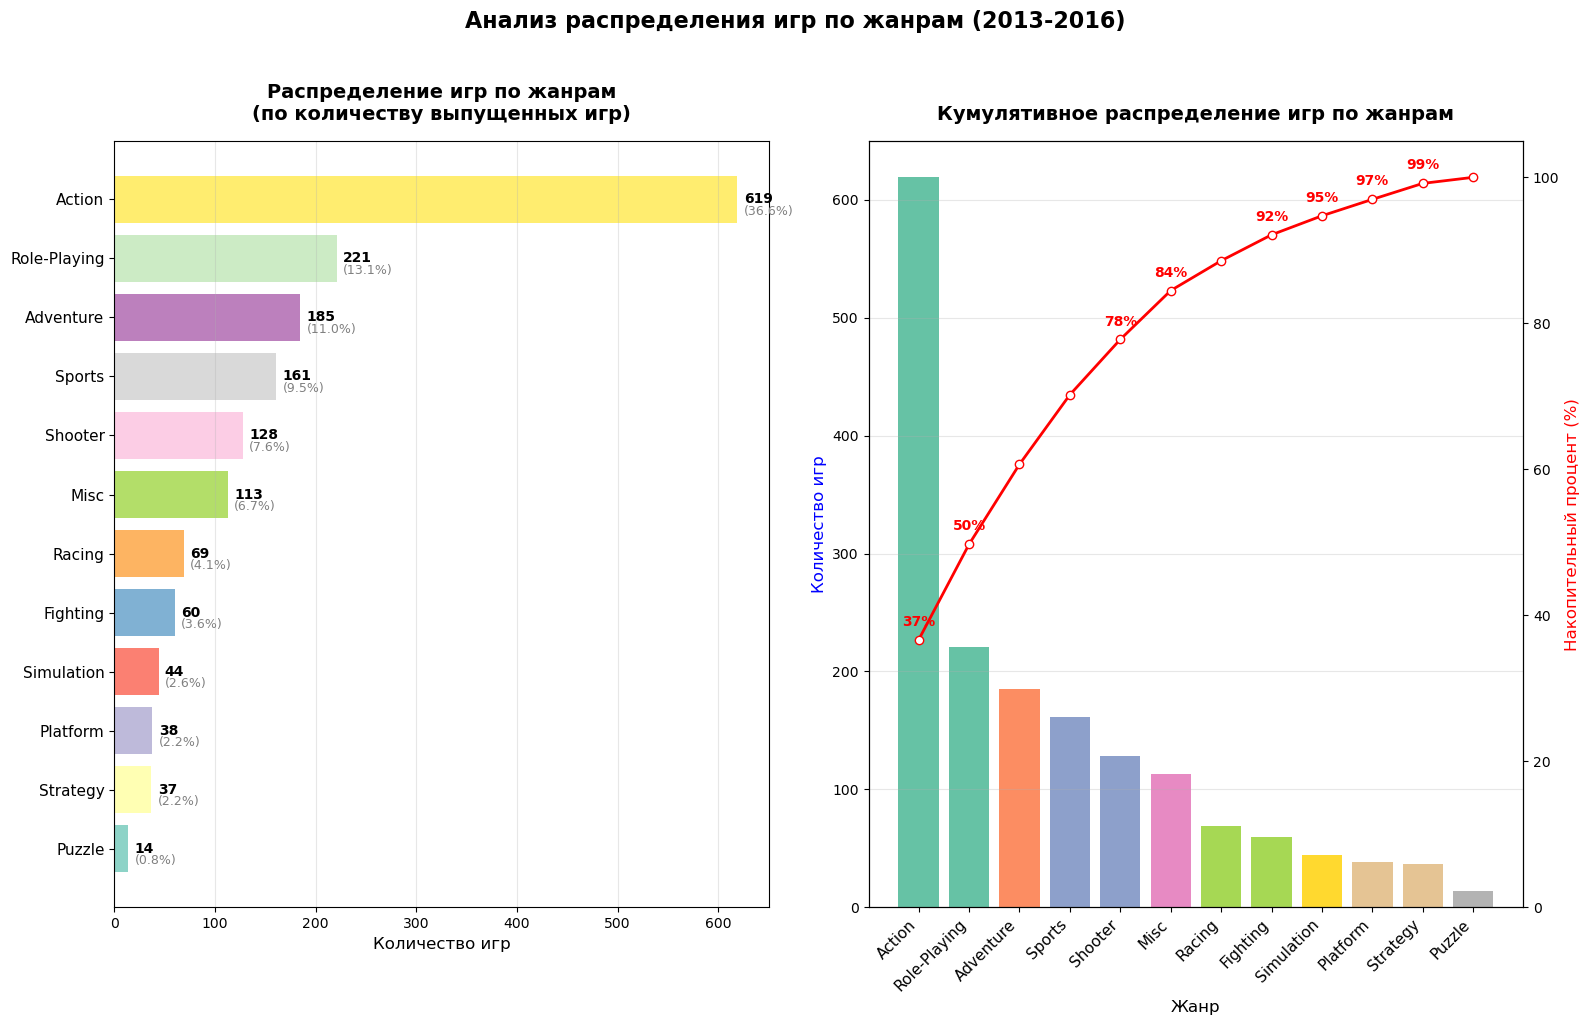

In [313]:
# 2.1. Распределение количества игр по жанрам (горизонтальные барчарты)
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Левый график: количество игр по жанрам
ax = axes[0]
genre_counts_sorted = genre_counts.sort_values()
bars = ax.barh(range(len(genre_counts_sorted)), genre_counts_sorted.values,
              color=plt.cm.Set3(np.arange(len(genre_counts_sorted)) / len(genre_counts_sorted)))

# Добавляем значения на столбцы
for i, (bar, count) in enumerate(zip(bars, genre_counts_sorted.values)):
    ax.text(count + max(genre_counts_sorted.values) * 0.01, i,
            f'{count}', va='center', fontsize=10, fontweight='bold')
    
    # Процент от общего числа
    percentage = count / len(df_curr) * 100
    ax.text(count + max(genre_counts_sorted.values) * 0.01, i - 0.2,
            f'({percentage:.1f}%)', va='center', fontsize=9, color='gray')

ax.set_yticks(range(len(genre_counts_sorted)))
ax.set_yticklabels(genre_counts_sorted.index, fontsize=11)
ax.set_xlabel('Количество игр', fontsize=12)
ax.set_title('Распределение игр по жанрам\n(по количеству выпущенных игр)', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3)

# Правый график: накопительная сумма (кумулятивное распределение)
ax = axes[1]
cumulative_counts = genre_counts.sort_values(ascending=False).cumsum()
cumulative_percentage = cumulative_counts / len(df_curr) * 100

# Столбчатая диаграмма с линией кумулятивного процента
x_pos = np.arange(len(genre_counts))
bars = ax.bar(x_pos, genre_counts.sort_values(ascending=False).values,
             color=plt.cm.Set2(np.arange(len(genre_counts)) / len(genre_counts)))

# Линия кумулятивного процента
ax2 = ax.twinx()
ax2.plot(x_pos, cumulative_percentage.values, 'r-o', linewidth=2, markersize=6,
        markerfacecolor='white', markeredgecolor='red')

# Настройки
ax.set_xticks(x_pos)
ax.set_xticklabels(genre_counts.sort_values(ascending=False).index, 
                  rotation=45, ha='right', fontsize=11)
ax.set_xlabel('Жанр', fontsize=12)
ax.set_ylabel('Количество игр', fontsize=12, color='blue')
ax2.set_ylabel('Накопительный процент (%)', fontsize=12, color='red')
ax2.set_ylim(0, 105)

ax.set_title('Кумулятивное распределение игр по жанрам', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3)

# Добавляем аннотации для ключевых порогов
for i, (genre, cum_perc) in enumerate(zip(genre_counts.sort_values(ascending=False).index, cumulative_percentage)):
    if cum_perc <= 50 or abs(cum_perc - 50) < 5 or abs(cum_perc - 80) < 5 or abs(cum_perc - 95) < 5:
        ax2.annotate(f'{cum_perc:.0f}%', xy=(i, cum_perc), xytext=(0, 10),
                    textcoords='offset points', ha='center', color='red',
                    fontsize=10, fontweight='bold')

plt.suptitle('Анализ распределения игр по жанрам (2013-2016)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


 АНАЛИЗ ПРИБЫЛЬНОСТИ ЖАНРОВ:

Топ-5 жанров по суммарным продажам:
  1. Action: 199.36 млн копий
  2. Shooter: 170.94 млн копий
  3. Sports: 109.48 млн копий
  4. Role-Playing: 101.44 млн копий
  5. Misc: 37.55 млн копий

 СТАТИСТИКА ПРОДАЖ ПО ЖАНРАМ:
Всего продано: 729.45 млн копий
Средние продажи на игру: 0.43 млн
Медианные продажи: 0.10 млн


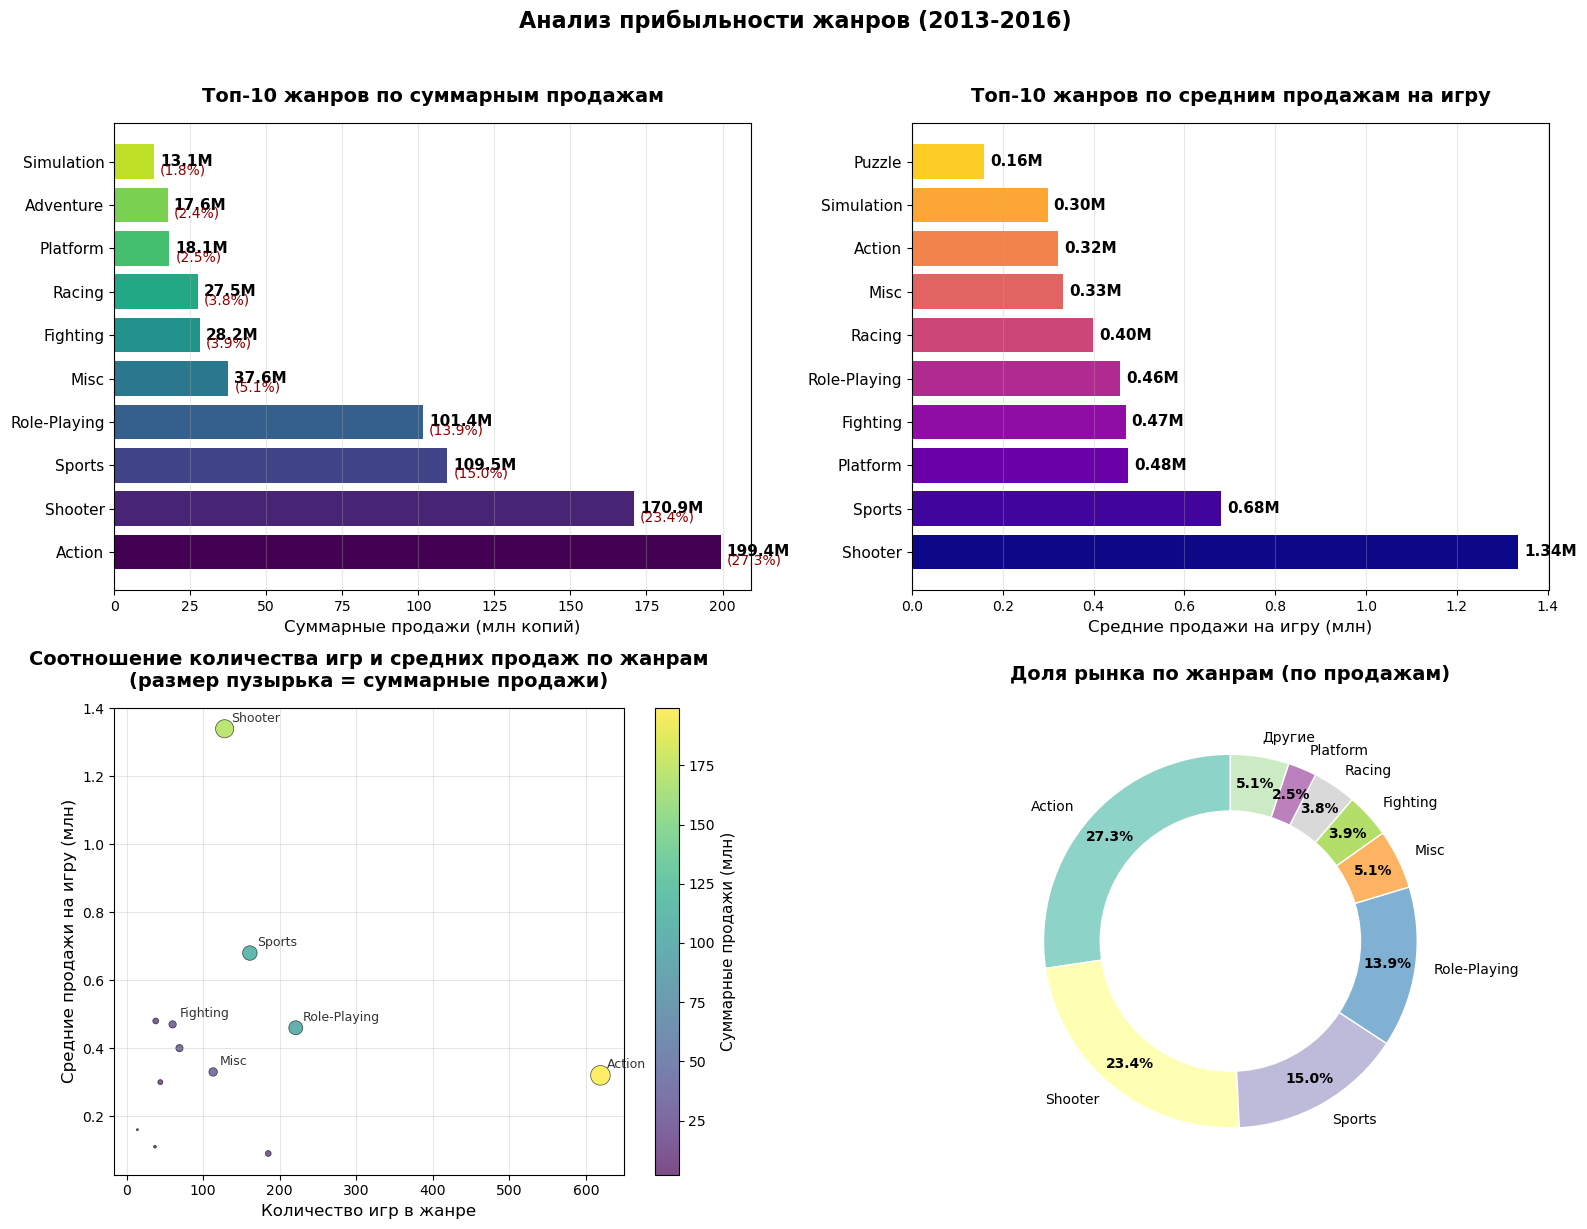

In [314]:
# 3.1. Анализ суммарных продаж по жанрам
print(f"\n АНАЛИЗ ПРИБЫЛЬНОСТИ ЖАНРОВ:")
print(f"\nТоп-5 жанров по суммарным продажам:")
for i, (genre, sales) in enumerate(genre_sales.head(5).items(), 1):
    print(f"  {i}. {genre}: {sales:.2f} млн копий")

# Дополнительная статистика по продажам
genre_stats = df_curr.groupby('genre')['total_sales'].agg(['sum', 'mean', 'median', 'count', 'std']).round(2)
genre_stats = genre_stats.sort_values('sum', ascending=False)
genre_stats['sales_per_game'] = genre_stats['sum'] / genre_stats['count']

print(f"\n СТАТИСТИКА ПРОДАЖ ПО ЖАНРАМ:")
print(f"Всего продано: {df_curr['total_sales'].sum():.2f} млн копий")
print(f"Средние продажи на игру: {df_curr['total_sales'].mean():.2f} млн")
print(f"Медианные продажи: {df_curr['total_sales'].median():.2f} млн")

# 3.2. Визуализация прибыльности жанров
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Суммарные продажи по жанрам
ax = axes[0, 0]
top_n = 10  # Покажем топ-10 жанров
top_genres_sales = genre_sales.head(top_n)

colors = plt.cm.viridis(np.arange(len(top_genres_sales)) / len(top_genres_sales))
bars = ax.barh(range(len(top_genres_sales)), top_genres_sales.values, color=colors)

# Добавляем значения
for i, (bar, sales) in enumerate(zip(bars, top_genres_sales.values)):
    ax.text(sales + max(top_genres_sales.values) * 0.01, i,
            f'{sales:.1f}M', va='center', fontsize=11, fontweight='bold')
    
    # Процент от общих продаж
    percentage = sales / genre_sales.sum() * 100
    ax.text(sales + max(top_genres_sales.values) * 0.01, i - 0.2,
            f'({percentage:.1f}%)', va='center', fontsize=10, color='darkred')

ax.set_yticks(range(len(top_genres_sales)))
ax.set_yticklabels(top_genres_sales.index, fontsize=11)
ax.set_xlabel('Суммарные продажи (млн копий)', fontsize=12)
ax.set_title(f'Топ-{top_n} жанров по суммарным продажам', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3)

# 2. Средние продажи на игру по жанрам
ax = axes[0, 1]
genre_avg_sales = df_curr.groupby('genre')['total_sales'].mean().sort_values(ascending=False).head(top_n)

colors = plt.cm.plasma(np.arange(len(genre_avg_sales)) / len(genre_avg_sales))
bars = ax.barh(range(len(genre_avg_sales)), genre_avg_sales.values, color=colors)

# Добавляем значения
for i, (bar, avg_sales) in enumerate(zip(bars, genre_avg_sales.values)):
    ax.text(avg_sales + max(genre_avg_sales.values) * 0.01, i,
            f'{avg_sales:.2f}M', va='center', fontsize=11, fontweight='bold')

ax.set_yticks(range(len(genre_avg_sales)))
ax.set_yticklabels(genre_avg_sales.index, fontsize=11)
ax.set_xlabel('Средние продажи на игру (млн)', fontsize=12)
ax.set_title(f'Топ-{top_n} жанров по средним продажам на игру', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3)

# 3. Количество игр vs Средние продажи (пузырьковая диаграмма)
ax = axes[1, 0]

# Готовим данные для пузырьковой диаграммы
bubble_data = []
for genre in genre_stats.index:
    count = genre_stats.loc[genre, 'count']
    avg_sales = genre_stats.loc[genre, 'mean']
    total_sales = genre_stats.loc[genre, 'sum']
    bubble_data.append({
        'genre': genre,
        'count': count,
        'avg_sales': avg_sales,
        'total_sales': total_sales,
        'bubble_size': total_sales / 10  # Масштабируем для размера пузырьков
    })

bubble_df = pd.DataFrame(bubble_data)

# Пузырьковая диаграмма
scatter = ax.scatter(bubble_df['count'], bubble_df['avg_sales'],
                    s=bubble_df['bubble_size']*10,  # Увеличиваем размер для наглядности
                    alpha=0.7, c=bubble_df['total_sales'],
                    cmap='viridis', edgecolors='black', linewidth=0.5)

# Добавляем подписи жанров (только для значимых)
for i, row in bubble_df.iterrows():
    if row['total_sales'] > genre_stats['sum'].quantile(0.5):  # Только топ 50%
        ax.annotate(row['genre'], xy=(row['count'], row['avg_sales']),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, alpha=0.8)

ax.set_xlabel('Количество игр в жанре', fontsize=12)
ax.set_ylabel('Средние продажи на игру (млн)', fontsize=12)
ax.set_title('Соотношение количества игр и средних продаж по жанрам\n(размер пузырька = суммарные продажи)', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3)

# Цветовая шкала
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Суммарные продажи (млн)', fontsize=11)

# 4. Доля рынка по жанрам (круговая диаграмма)
ax = axes[1, 1]

# Топ-8 жанров + "Остальные"
top_for_pie = 8
top_genres_pie = genre_sales.head(top_for_pie)
other_sales = genre_sales[top_for_pie:].sum()

# Добавляем "Остальные"
pie_data = pd.concat([top_genres_pie, pd.Series({'Другие': other_sales})])
pie_data = pie_data[pie_data > 0]  # Убираем нулевые

# Цвета
colors_pie = plt.cm.Set3(np.arange(len(pie_data)) / len(pie_data))

# Круговая диаграмма с выносками
wedges, texts, autotexts = ax.pie(pie_data.values, labels=pie_data.index,
                                  autopct='%1.1f%%', startangle=90,
                                  colors=colors_pie, pctdistance=0.85,
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Делаем проценты более читаемыми
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Центральный круг для красоты
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

ax.set_title('Доля рынка по жанрам (по продажам)', 
            fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Анализ прибыльности жанров (2013-2016)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


 КЛАССИФИКАЦИЯ ЖАНРОВ ПО УРОВНЮ ПРОДАЖ:

Критерии классификации (средние продажи на игру):
  • Низкие продажи: < 0.26 млн (нижние 25%)
  • Средние продажи: 0.26 - 0.47 млн
  • Высокие продажи: > 0.47 млн (верхние 25%)

 ЖАНРЫ С ВЫСОКИМИ ПРОДАЖАМИ (> 0.47 млн):
  1. Shooter: 1.34 млн (игр: 128)
  2. Sports: 0.68 млн (игр: 161)
  3. Platform: 0.48 млн (игр: 38)

 ЖАНРЫ СО СРЕДНИМИ ПРОДАЖАМИ (0.26 - 0.47 млн):
  1. Fighting: 0.47 млн (игр: 60)
  2. Role-Playing: 0.46 млн (игр: 221)
  3. Racing: 0.40 млн (игр: 69)
  4. Misc: 0.33 млн (игр: 113)
  5. Action: 0.32 млн (игр: 619)
  6. Simulation: 0.30 млн (игр: 44)

 ЖАНРЫ С НИЗКИМИ ПРОДАЖАМИ (< 0.26 млн):
  1. Puzzle: 0.16 млн (игр: 14)
  2. Strategy: 0.11 млн (игр: 37)
  3. Adventure: 0.09 млн (игр: 185)


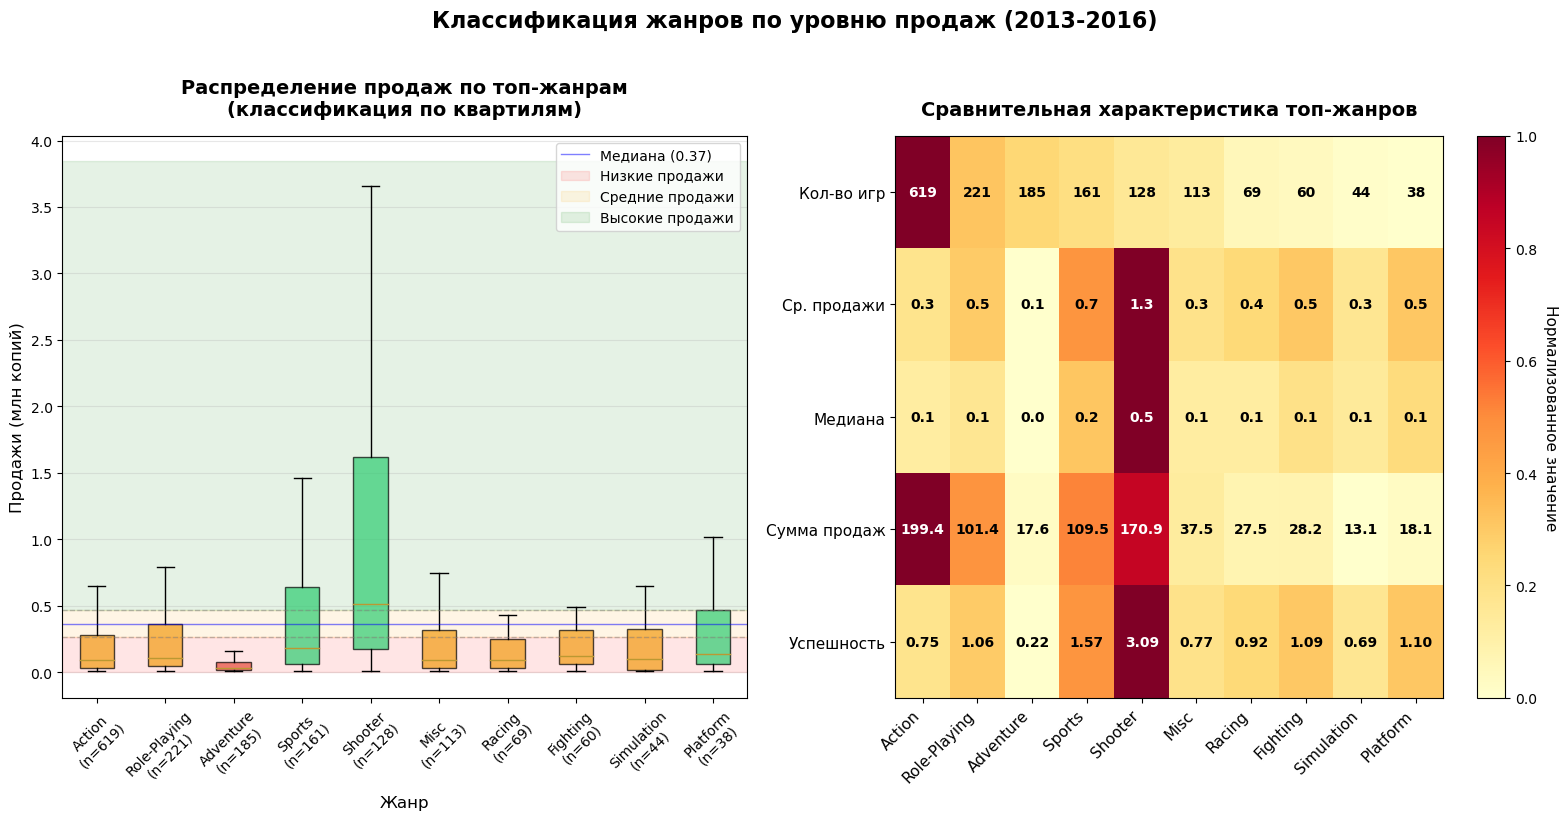

In [315]:
# 4.1. Классификация жанров по уровню продаж
print(f"\n КЛАССИФИКАЦИЯ ЖАНРОВ ПО УРОВНЮ ПРОДАЖ:")
print("=" * 60)

# Рассчитываем квартили для классификации
genre_avg_sales_all = df_curr.groupby('genre')['total_sales'].mean()
q1 = genre_avg_sales_all.quantile(0.25)
q2 = genre_avg_sales_all.quantile(0.5)  # Медиана
q3 = genre_avg_sales_all.quantile(0.75)

print(f"\nКритерии классификации (средние продажи на игру):")
print(f"  • Низкие продажи: < {q1:.2f} млн (нижние 25%)")
print(f"  • Средние продажи: {q1:.2f} - {q3:.2f} млн")
print(f"  • Высокие продажи: > {q3:.2f} млн (верхние 25%)")

# Классифицируем жанры
high_sales_genres = genre_avg_sales_all[genre_avg_sales_all > q3].sort_values(ascending=False)
medium_sales_genres = genre_avg_sales_all[(genre_avg_sales_all >= q1) & (genre_avg_sales_all <= q3)].sort_values(ascending=False)
low_sales_genres = genre_avg_sales_all[genre_avg_sales_all < q1].sort_values(ascending=False)

print(f"\n ЖАНРЫ С ВЫСОКИМИ ПРОДАЖАМИ (> {q3:.2f} млн):")
for i, (genre, sales) in enumerate(high_sales_genres.items(), 1):
    count = genre_counts[genre]
    print(f"  {i}. {genre}: {sales:.2f} млн (игр: {count})")

print(f"\n ЖАНРЫ СО СРЕДНИМИ ПРОДАЖАМИ ({q1:.2f} - {q3:.2f} млн):")
for i, (genre, sales) in enumerate(medium_sales_genres.items(), 1):
    count = genre_counts[genre]
    print(f"  {i}. {genre}: {sales:.2f} млн (игр: {count})")

print(f"\n ЖАНРЫ С НИЗКИМИ ПРОДАЖАМИ (< {q1:.2f} млн):")
for i, (genre, sales) in enumerate(low_sales_genres.items(), 1):
    count = genre_counts[genre]
    print(f"  {i}. {genre}: {sales:.2f} млн (игр: {count})")

# 4.2. Визуализация классификации
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Левый график: Box plot по жанрам
ax = axes[0]

# Подготавливаем данные для box plot (только топ-N жанров по количеству игр)
top_genres_box = genre_counts.head(10).index.tolist()
box_data = []
box_labels = []

for genre in top_genres_box:
    genre_sales_data = df_curr[df_curr['genre'] == genre]['total_sales'].values
    if len(genre_sales_data) > 0:
        box_data.append(genre_sales_data)
        box_labels.append(f"{genre}\n(n={len(genre_sales_data)})")

# Box plot
boxplot = ax.boxplot(box_data, labels=box_labels, patch_artist=True, showfliers=False)

# Раскрашиваем по уровню продаж
for i, (genre, box) in enumerate(zip(top_genres_box, boxplot['boxes'])):
    avg_sales = genre_avg_sales_all[genre]
    if avg_sales > q3:
        box.set_facecolor('#2ECC71')  # Зелёный для высоких
        box.set_alpha(0.7)
    elif avg_sales < q1:
        box.set_facecolor('#E74C3C')  # Красный для низких
        box.set_alpha(0.7)
    else:
        box.set_facecolor('#F39C12')  # Оранжевый для средних
        box.set_alpha(0.7)

# Добавляем горизонтальные линии для квартилей
ax.axhline(y=q1, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axhline(y=q2, color='blue', linestyle='-', alpha=0.5, linewidth=1, label=f'Медиана ({q2:.2f})')
ax.axhline(y=q3, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Заливка областей
ax.axhspan(0, q1, alpha=0.1, color='red', label='Низкие продажи')
ax.axhspan(q1, q3, alpha=0.1, color='orange', label='Средние продажи')
ax.axhspan(q3, ax.get_ylim()[1], alpha=0.1, color='green', label='Высокие продажи')

ax.set_xlabel('Жанр', fontsize=12)
ax.set_ylabel('Продажи (млн копий)', fontsize=12)
ax.set_title('Распределение продаж по топ-жанрам\n(классификация по квартилям)', 
            fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Правый график: Тепловая карта корреляций
ax = axes[1]

# Создаём матрицу для тепловой карты
heatmap_data = pd.DataFrame()

for genre in top_genres_box:
    genre_data = df_curr[df_curr['genre'] == genre]
    if len(genre_data) > 10:  # Только жанры с достаточным количеством данных
        # Средние показатели по жанру
        heatmap_data.loc[genre, 'Кол-во игр'] = len(genre_data)
        heatmap_data.loc[genre, 'Ср. продажи'] = genre_data['total_sales'].mean()
        heatmap_data.loc[genre, 'Медиана'] = genre_data['total_sales'].median()
        heatmap_data.loc[genre, 'Сумма продаж'] = genre_data['total_sales'].sum()
        heatmap_data.loc[genre, 'Успешность'] = (genre_data['total_sales'].mean() / 
                                                df_curr['total_sales'].mean())

# Нормализуем данные для тепловой карты
heatmap_data_normalized = heatmap_data.copy()
for col in heatmap_data.columns:
    if heatmap_data[col].max() > heatmap_data[col].min():
        heatmap_data_normalized[col] = (heatmap_data[col] - heatmap_data[col].min()) / \
                                      (heatmap_data[col].max() - heatmap_data[col].min())

# Тепловая карта
im = ax.imshow(heatmap_data_normalized.T, aspect='auto', cmap='YlOrRd')

# Настройка осей
ax.set_xticks(range(len(heatmap_data_normalized)))
ax.set_yticks(range(len(heatmap_data_normalized.columns)))
ax.set_xticklabels(heatmap_data_normalized.index, rotation=45, ha='right', fontsize=11)
ax.set_yticklabels(heatmap_data_normalized.columns, fontsize=11)

# Добавляем значения в ячейки
for i in range(len(heatmap_data_normalized)):
    for j in range(len(heatmap_data_normalized.columns)):
        value = heatmap_data.iloc[i, j]
        if j == 0:  # Количество игр
            text = f'{int(value)}'
        elif j == 4:  # Успешность
            text = f'{value:.2f}'
        else:
            text = f'{value:.1f}'
        
        ax.text(i, j, text, ha='center', va='center', 
               color='black' if heatmap_data_normalized.iloc[i, j] < 0.6 else 'white',
               fontsize=10, fontweight='bold')

ax.set_title('Сравнительная характеристика топ-жанров', 
            fontsize=14, fontweight='bold', pad=15)

# Цветовая шкала
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Нормализованное значение', rotation=-90, va="bottom", fontsize=11)

plt.suptitle('Классификация жанров по уровню продаж (2013-2016)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


 ПОДРОБНЫЙ АНАЛИЗ САМЫХ ПРИБЫЛЬНЫХ ЖАНРОВ:

1. ACTION:
   ────────────────────────────────────────
   • Количество игр: 619
   • Суммарные продажи: 199.36 млн
   • Средние продажи на игру: 0.32 млн
   • Медианные продажи: 0.09 млн
   • Максимальные продажи: 12.62 млн
   • Минимальные продажи: 0.01 млн
   • Топ платформы для жанра Action:
     - PS4: 142 игр, продаж: 91.62 млн
     - PSV: 111 игр, продаж: 7.47 млн
     - 3DS: 87 игр, продаж: 22.06 млн
   • Динамика по годам:
     - 2014: 97.23 млн
     - 2015: 72.02 млн
     - 2016: 30.11 млн

2. SHOOTER:
   ────────────────────────────────────────
   • Количество игр: 128
   • Суммарные продажи: 170.94 млн
   • Средние продажи на игру: 1.34 млн
   • Медианные продажи: 0.52 млн
   • Максимальные продажи: 14.63 млн
   • Минимальные продажи: 0.01 млн
   • Топ платформы для жанра Shooter:
     - PS4: 38 игр, продаж: 78.46 млн
     - XOne: 36 игр, продаж: 55.39 млн
     - PC: 21 игр, продаж: 5.79 млн
   • Динамика по годам:
     - 2014: 65

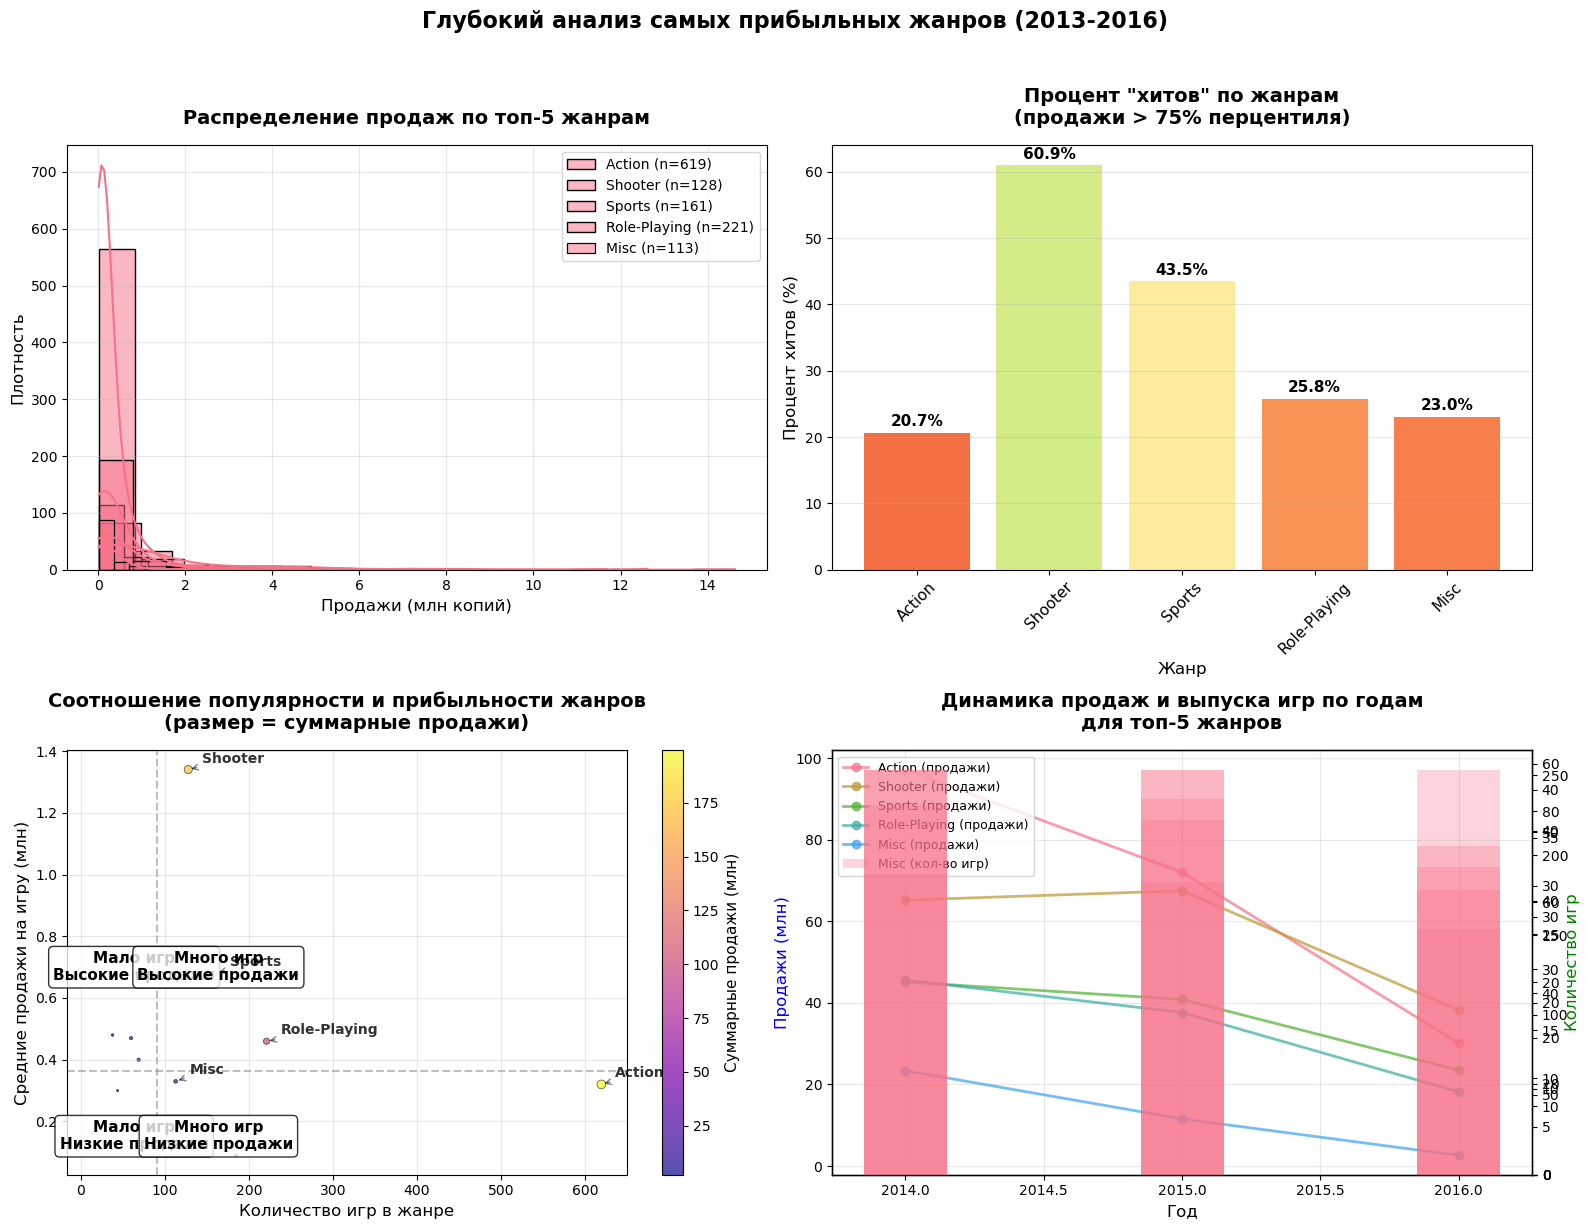

In [316]:
# 5.1. Подробный анализ топ-3 самых прибыльных жанров
print(f"\n ПОДРОБНЫЙ АНАЛИЗ САМЫХ ПРИБЫЛЬНЫХ ЖАНРОВ:")
print("=" * 70)

top_profitable_genres = genre_sales.head(3).index.tolist()

for i, genre in enumerate(top_profitable_genres, 1):
    genre_data = df_curr[df_curr['genre'] == genre]
    
    print(f"\n{i}. {genre.upper()}:")
    print(f"   {'─' * 40}")
    print(f"   • Количество игр: {len(genre_data)}")
    print(f"   • Суммарные продажи: {genre_data['total_sales'].sum():.2f} млн")
    print(f"   • Средние продажи на игру: {genre_data['total_sales'].mean():.2f} млн")
    print(f"   • Медианные продажи: {genre_data['total_sales'].median():.2f} млн")
    print(f"   • Максимальные продажи: {genre_data['total_sales'].max():.2f} млн")
    print(f"   • Минимальные продажи: {genre_data['total_sales'].min():.2f} млн")
    
    # Анализ по платформам для этого жанра
    print(f"   • Топ платформы для жанра {genre}:")
    platform_dist = genre_data['platform'].value_counts().head(3)
    for platform, count in platform_dist.items():
        platform_sales = genre_data[genre_data['platform'] == platform]['total_sales'].sum()
        print(f"     - {platform}: {count} игр, продаж: {platform_sales:.2f} млн")
    
    # Анализ по годам
    print(f"   • Динамика по годам:")
    yearly_sales = genre_data.groupby('year_of_release')['total_sales'].sum()
    for year, sales in yearly_sales.sort_index().items():
        print(f"     - {int(year)}: {sales:.2f} млн")

# 5.2. Сравнение топ жанров
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Сравнение распределения продаж топ жанров
ax = axes[0, 0]
top_genres_comparison = genre_sales.head(5).index.tolist()

for i, genre in enumerate(top_genres_comparison):
    genre_sales_data = df_curr[df_curr['genre'] == genre]['total_sales']
    
    # Гистограмма с KDE
    sns.histplot(genre_sales_data, kde=True, ax=ax, 
                label=f"{genre} (n={len(genre_sales_data)})", 
                alpha=0.5, bins=15)

ax.set_xlabel('Продажи (млн копий)', fontsize=12)
ax.set_ylabel('Плотность', fontsize=12)
ax.set_title('Распределение продаж по топ-5 жанрам', 
            fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# 2. Процент хитов по жанрам
ax = axes[0, 1]

# Определяем "хиты" как игры с продажами выше 75% перцентиля
hit_threshold = df_curr['total_sales'].quantile(0.75)

hit_percentages = []
for genre in top_genres_comparison:
    genre_data = df_curr[df_curr['genre'] == genre]
    if len(genre_data) > 0:
        hit_count = (genre_data['total_sales'] > hit_threshold).sum()
        hit_percentage = (hit_count / len(genre_data)) * 100
        hit_percentages.append(hit_percentage)
    else:
        hit_percentages.append(0)

bars = ax.bar(range(len(top_genres_comparison)), hit_percentages,
             color=plt.cm.RdYlGn(np.array(hit_percentages) / 100))

# Добавляем значения
for i, (bar, percentage) in enumerate(zip(bars, hit_percentages)):
    ax.text(i, percentage + 1, f'{percentage:.1f}%', 
           ha='center', fontsize=11, fontweight='bold')

ax.set_xticks(range(len(top_genres_comparison)))
ax.set_xticklabels(top_genres_comparison, fontsize=11, rotation=45)
ax.set_xlabel('Жанр', fontsize=12)
ax.set_ylabel('Процент хитов (%)', fontsize=12)
ax.set_title('Процент "хитов" по жанрам\n(продажи > 75% перцентиля)', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3)

# 3. Соотношение количество/прибыльность
ax = axes[1, 0]

# Пузырьковая диаграмма для всех жанров
genres_all = genre_stats.index
counts_all = [genre_counts[g] for g in genres_all]
avg_sales_all = [genre_stats.loc[g, 'mean'] for g in genres_all]
total_sales_all = [genre_stats.loc[g, 'sum'] for g in genres_all]

scatter = ax.scatter(counts_all, avg_sales_all, 
                    s=np.array(total_sales_all)/5,  # Размер пузырька
                    alpha=0.7, c=total_sales_all,
                    cmap='plasma', edgecolors='black', linewidth=0.5)

# Разделяем на квадранты
median_count = np.median(counts_all)
median_avg_sales = np.median(avg_sales_all)

ax.axhline(y=median_avg_sales, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=median_count, color='gray', linestyle='--', alpha=0.5)

# Подписи для квадрантов
ax.text(median_count*0.7, median_avg_sales*1.8, 'Мало игр\nВысокие продажи', 
        fontsize=11, fontweight='bold', ha='center', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
ax.text(median_count*1.8, median_avg_sales*1.8, 'Много игр\nВысокие продажи', 
        fontsize=11, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
ax.text(median_count*0.7, median_avg_sales*0.3, 'Мало игр\nНизкие продажи', 
        fontsize=11, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
ax.text(median_count*1.8, median_avg_sales*0.3, 'Много игр\nНизкие продажи', 
        fontsize=11, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Добавляем подписи для топ жанров
for i, genre in enumerate(top_genres_comparison):
    if genre in genres_all:
        idx = list(genres_all).index(genre)
        ax.annotate(genre, xy=(counts_all[idx], avg_sales_all[idx]),
                   xytext=(10, 5), textcoords='offset points',
                   fontsize=10, fontweight='bold', alpha=0.8,
                   arrowprops=dict(arrowstyle='->', alpha=0.5))

ax.set_xlabel('Количество игр в жанре', fontsize=12)
ax.set_ylabel('Средние продажи на игру (млн)', fontsize=12)
ax.set_title('Соотношение популярности и прибыльности жанров\n(размер = суммарные продажи)', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Суммарные продажи (млн)', fontsize=11)

# 4. Тренды по годам для топ жанров
ax = axes[1, 1]

for genre in top_genres_comparison:
    yearly_genre_data = df_curr[df_curr['genre'] == genre]
    if len(yearly_genre_data) > 0:
        yearly_sales = yearly_genre_data.groupby('year_of_release')['total_sales'].sum()
        yearly_count = yearly_genre_data.groupby('year_of_release').size()
        
        # Линия продаж
        ax.plot(yearly_sales.index, yearly_sales.values, 'o-', linewidth=2, 
               label=f'{genre} (продажи)', alpha=0.7)
        
        # Столбцы количества игр (второя ось Y)
        ax2 = ax.twinx()
        ax2.bar(yearly_sales.index, yearly_count.values, alpha=0.3, 
               label=f'{genre} (кол-во игр)', width=0.3)

ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Продажи (млн)', fontsize=12, color='blue')
ax2.set_ylabel('Количество игр', fontsize=12, color='green')
ax.set_title('Динамика продаж и выпуска игр по годам\nдля топ-5 жанров', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3)

# Объединяем легенды
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)

plt.suptitle('Глубокий анализ самых прибыльных жанров (2013-2016)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [317]:
print("\n" + "="*80)
print("ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("="*80)

print(f"\n ОСНОВНЫЕ ВЫВОДЫ:")
print(f"1. Всего анализировано {len(df_curr)} игр за период 2013-2016")
print(f"2. Количество уникальных жанров: {df_curr['genre'].nunique()}")
print(f"3. Общий объём продаж: {df_curr['total_sales'].sum():.2f} млн копий")

print(f"\n САМЫЕ ПРИБЫЛЬНЫЕ ЖАНРЫ:")
for i, (genre, sales) in enumerate(genre_sales.head(3).items(), 1):
    percentage = sales / genre_sales.sum() * 100
    print(f"  {i}. {genre}: {sales:.2f} млн копий ({percentage:.1f}% от общих продаж)")

print(f"\n ВЫСОКОПРИБЫЛЬНЫЕ ЖАНРЫ (высокие средние продажи):")
for i, (genre, avg_sales) in enumerate(high_sales_genres.items(), 1):
    count = genre_counts[genre]
    print(f"  {i}. {genre}: {avg_sales:.2f} млн/игру (игр: {count})")

print(f"\n НИЗКОПРИБЫЛЬНЫЕ ЖАНРЫ (низкие средние продажи):")
for i, (genre, avg_sales) in enumerate(low_sales_genres.head(3).items(), 1):
    count = genre_counts[genre]
    print(f"  {i}. {genre}: {avg_sales:.2f} млн/игру (игр: {count})")

print(f"\n КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:")
# Находим жанры с лучшим соотношением количества и прибыльности
profitability_ratio = {}
for genre in genre_stats.index:
    if genre_counts[genre] > 10:  # Только жанры с достаточным количеством игр
        profitability_ratio[genre] = genre_stats.loc[genre, 'mean'] / genre_counts[genre]

top_efficient = sorted(profitability_ratio.items(), key=lambda x: x[1], reverse=True)[:3]

print("1. Жанры с лучшим соотношением прибыльности и количества игр:")
for i, (genre, ratio) in enumerate(top_efficient, 1):
    print(f"   • {genre}: высокая средняя прибыль при умеренном количестве игр")

print("\n2. Жанры-лидеры по разным метрикам:")
print(f"   • По суммарным продажам: {genre_sales.index[0]}")
print(f"   • По средним продажам на игру: {genre_avg_sales_all.idxmax()}")
print(f"   • По количеству выпущенных игр: {genre_counts.index[0]}")

print(f"\n РЕКОМЕНДАЦИИ ДЛЯ ИЗДАТЕЛЕЙ:")
print("1. Сфокусируйтесь на высокоприбыльных жанрах: " + ", ".join(high_sales_genres.index[:3]))
print("2. Рассмотрите жанры с хорошим соотношением риска и доходности: " + ", ".join([g for g, _ in top_efficient[:3]]))
print("3. Для диверсификации портфеля учитывайте также популярные жанры с большим количеством игр")
print("4. При выпуске игр в низкоприбыльных жанрах нужна особая стратегия маркетинга")
print("5. Анализируйте не только жанр, но и платформу, издателя и время релиза")

print("="*80)


ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

 ОСНОВНЫЕ ВЫВОДЫ:
1. Всего анализировано 1689 игр за период 2013-2016
2. Количество уникальных жанров: 12
3. Общий объём продаж: 729.45 млн копий

 САМЫЕ ПРИБЫЛЬНЫЕ ЖАНРЫ:
  1. Action: 199.36 млн копий (27.3% от общих продаж)
  2. Shooter: 170.94 млн копий (23.4% от общих продаж)
  3. Sports: 109.48 млн копий (15.0% от общих продаж)

 ВЫСОКОПРИБЫЛЬНЫЕ ЖАНРЫ (высокие средние продажи):
  1. Shooter: 1.34 млн/игру (игр: 128)
  2. Sports: 0.68 млн/игру (игр: 161)
  3. Platform: 0.48 млн/игру (игр: 38)

 НИЗКОПРИБЫЛЬНЫЕ ЖАНРЫ (низкие средние продажи):
  1. Puzzle: 0.16 млн/игру (игр: 14)
  2. Strategy: 0.11 млн/игру (игр: 37)
  3. Adventure: 0.09 млн/игру (игр: 185)

 КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
1. Жанры с лучшим соотношением прибыльности и количества игр:
   • Platform: высокая средняя прибыль при умеренном количестве игр
   • Puzzle: высокая средняя прибыль при умеренном количестве игр
   • Shooter: высокая средняя прибыль при умеренном количестве игр

2. Жанры-л

ФИНАЛЬНЫЙ ОТЧЕТ: АНАЛИЗ ПРИБЫЛЬНОСТИ ЖАНРОВ ВИДЕОИГР
Период: 2013-2016 | Объём выборки: 1,689 игр


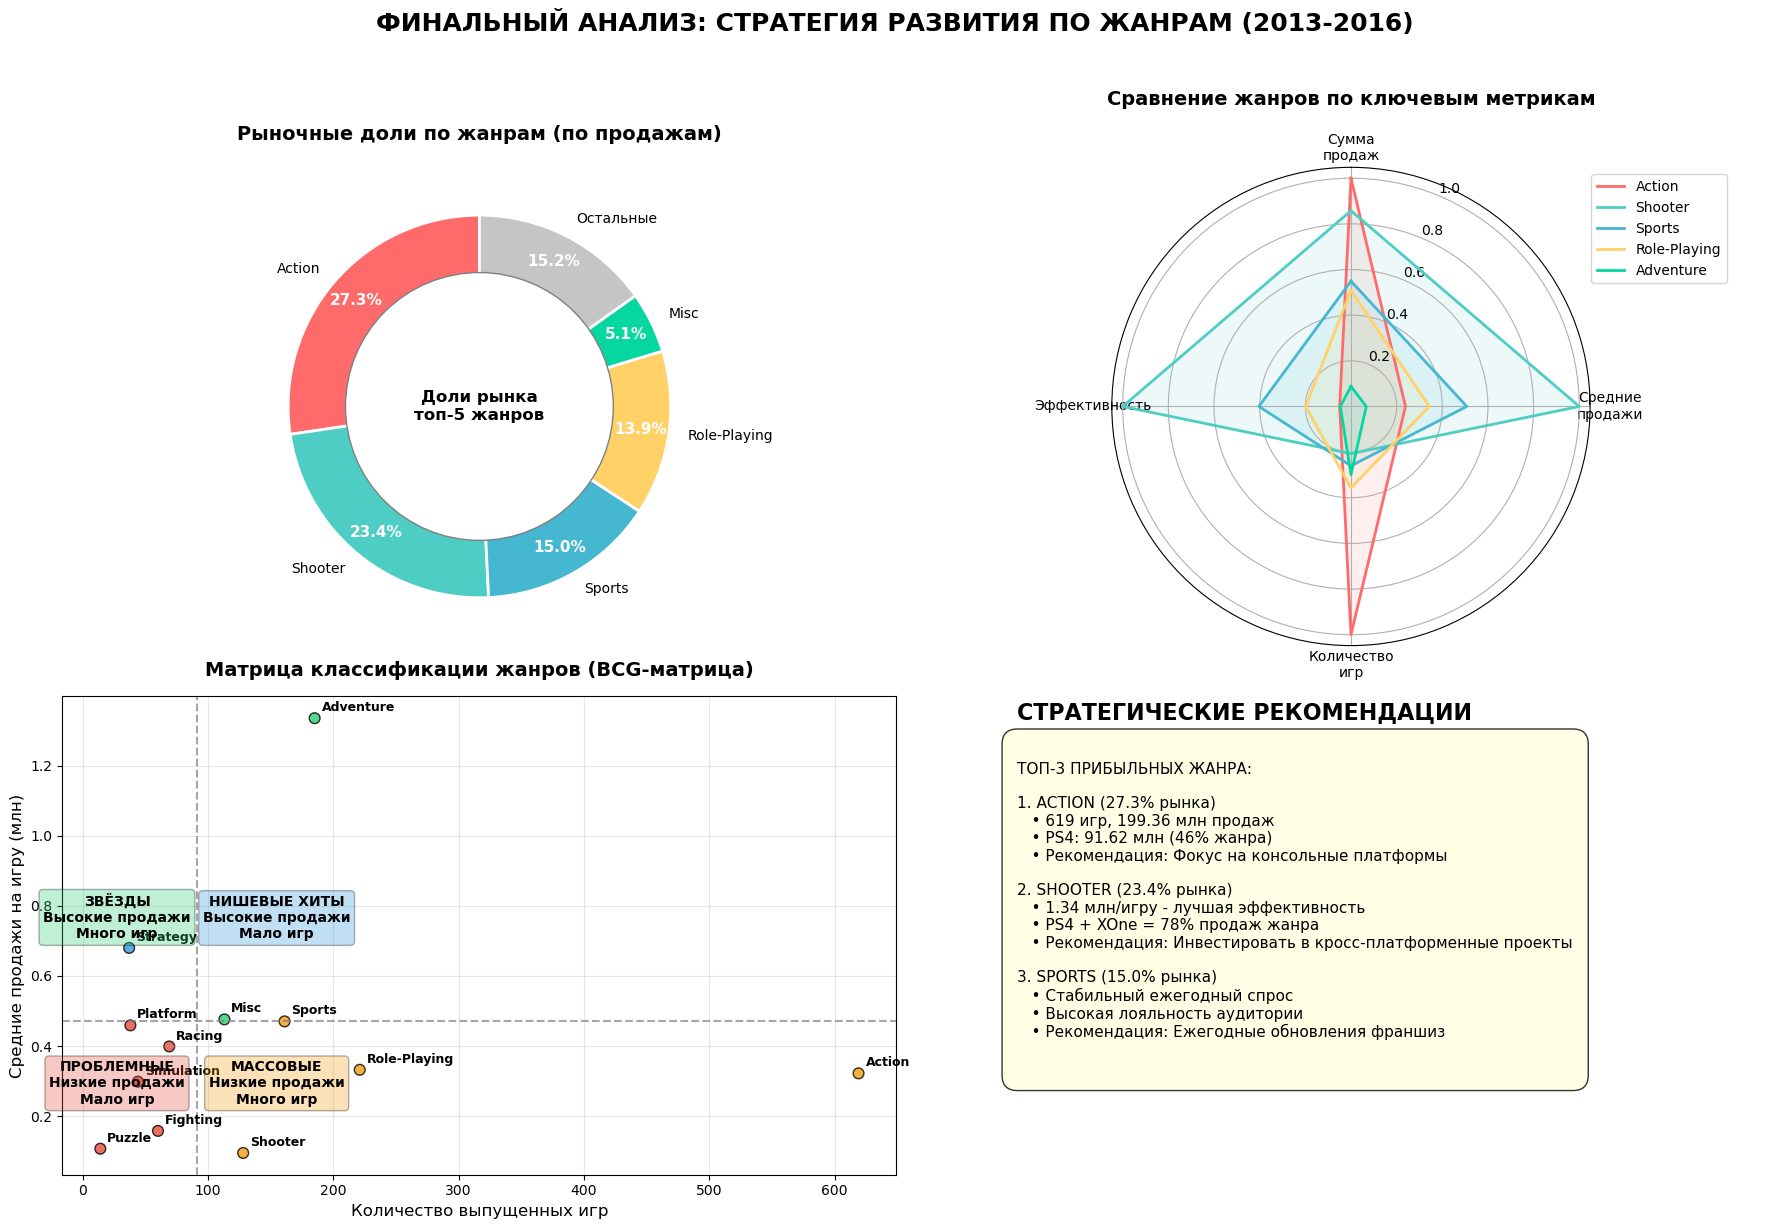

In [318]:
# Создаём финальный отчёт с визуализацией
print("=" * 100)
print("ФИНАЛЬНЫЙ ОТЧЕТ: АНАЛИЗ ПРИБЫЛЬНОСТИ ЖАНРОВ ВИДЕОИГР")
print("Период: 2013-2016 | Объём выборки: 1,689 игр")
print("=" * 100)

# Создаём итоговую инфографику
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. КРУПНЕЙШИЕ ЖАНРЫ ПО ДОЛЯМ РЫНКА
ax = axes[0, 0]

# Данные для круговой диаграммы
top_genres_market_share = genre_sales.head(5)
other_sales = genre_sales[5:].sum()
market_share_data = pd.concat([top_genres_market_share, 
                               pd.Series({'Остальные': other_sales})])

colors_market = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFD166', '#06D6A0', '#C5C5C5']
wedges, texts, autotexts = ax.pie(market_share_data.values, 
                                  labels=market_share_data.index,
                                  autopct='%1.1f%%', startangle=90,
                                  colors=colors_market, pctdistance=0.85,
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Украшаем проценты
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Центральный текст
centre_circle = plt.Circle((0,0),0.70,fc='white', edgecolor='gray', linewidth=1)
ax.add_artist(centre_circle)
ax.text(0, 0, 'Доли рынка\nтоп-5 жанров', 
        ha='center', va='center', fontsize=12, fontweight='bold')

ax.set_title('Рыночные доли по жанрам (по продажам)', 
            fontsize=14, fontweight='bold', pad=20)

# 2. СРАВНЕНИЕ ПРИБЫЛЬНОСТИ ПО КРИТЕРИЯМ
ax = axes[0, 1]

# Подготавливаем данные для сравнения
comparison_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Adventure']
comparison_data = []

for genre in comparison_genres:
    if genre in genre_stats.index:
        comparison_data.append({
            'Жанр': genre,
            'Сумма продаж (млн)': genre_stats.loc[genre, 'sum'],
            'Средние продажи (млн)': genre_stats.loc[genre, 'mean'],
            'Количество игр': genre_counts[genre],
            'Эффективность': genre_stats.loc[genre, 'mean'] / genre_counts[genre] * 1000
        })

comparison_df = pd.DataFrame(comparison_data)

# Нормализуем для радиальной диаграммы
normalized_df = comparison_df.copy()
for col in ['Сумма продаж (млн)', 'Средние продажи (млн)', 'Количество игр', 'Эффективность']:
    if normalized_df[col].max() > 0:
        normalized_df[col] = normalized_df[col] / normalized_df[col].max()

# Радиальная диаграмма
categories = ['Сумма\nпродаж', 'Средние\nпродажи', 'Количество\nигр', 'Эффективность']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(222, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories, fontsize=10)

# Рисуем для каждого жанра
colors_radar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFD166', '#06D6A0']
for i, (idx, row) in enumerate(normalized_df.iterrows()):
    values = row[['Сумма продаж (млн)', 'Средние продажи (млн)', 
                  'Количество игр', 'Эффективность']].values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', 
            label=row['Жанр'], color=colors_radar[i])
    ax.fill(angles, values, alpha=0.1, color=colors_radar[i])

ax.set_title('Сравнение жанров по ключевым метрикам', 
            fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 3. КЛАССИФИКАЦИЯ ЖАНРОВ
ax = axes[1, 0]

# Создаём матрицу классификации
classification_matrix = pd.DataFrame({
    'Жанр': genre_stats.index,
    'Средние продажи': genre_avg_sales_all.values,
    'Количество игр': [genre_counts[g] for g in genre_stats.index]
})

# Определяем квадранты
high_sales_threshold = q3
high_count_threshold = np.median([genre_counts[g] for g in genre_stats.index])

# Размечаем точки
colors_class = []
for i, row in classification_matrix.iterrows():
    if row['Средние продажи'] > high_sales_threshold and row['Количество игр'] > high_count_threshold:
        colors_class.append('#2ECC71')  # Зелёный - звёзды
        marker = '★'
        size = 120
    elif row['Средние продажи'] > high_sales_threshold:
        colors_class.append('#3498DB')  # Синий - нишевые хиты
        marker = '▲'
        size = 100
    elif row['Количество игр'] > high_count_threshold:
        colors_class.append('#F39C12')  # Оранжевый - массовые
        marker = '●'
        size = 80
    else:
        colors_class.append('#E74C3C')  # Красный - проблемные
        marker = '▼'
        size = 60

# Точечная диаграмма
scatter = ax.scatter(classification_matrix['Количество игр'], 
                    classification_matrix['Средние продажи'],
                    s=[size for _ in range(len(classification_matrix))],
                    c=colors_class, alpha=0.8, edgecolors='black', linewidth=1)

# Добавляем подписи
for i, row in classification_matrix.iterrows():
    ax.annotate(row['Жанр'], 
               xy=(row['Количество игр'], row['Средние продажи']),
               xytext=(5, 5), textcoords='offset points',
               fontsize=9, fontweight='bold')

# Линии разделения
ax.axhline(y=high_sales_threshold, color='gray', linestyle='--', alpha=0.7)
ax.axvline(x=high_count_threshold, color='gray', linestyle='--', alpha=0.7)

# Подписи квадрантов
ax.text(high_count_threshold * 0.3, high_sales_threshold * 1.5, 
        'ЗВЁЗДЫ\nВысокие продажи\nМного игр',
        fontsize=10, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="#2ECC71", alpha=0.3))
ax.text(high_count_threshold * 0.3, high_sales_threshold * 0.5, 
        'ПРОБЛЕМНЫЕ\nНизкие продажи\nМало игр',
        fontsize=10, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="#E74C3C", alpha=0.3))
ax.text(high_count_threshold * 1.7, high_sales_threshold * 1.5, 
        'НИШЕВЫЕ ХИТЫ\nВысокие продажи\nМало игр',
        fontsize=10, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="#3498DB", alpha=0.3))
ax.text(high_count_threshold * 1.7, high_sales_threshold * 0.5, 
        'МАССОВЫЕ\nНизкие продажи\nМного игр',
        fontsize=10, fontweight='bold', ha='center',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="#F39C12", alpha=0.3))

ax.set_xlabel('Количество выпущенных игр', fontsize=12)
ax.set_ylabel('Средние продажи на игру (млн)', fontsize=12)
ax.set_title('Матрица классификации жанров (BCG-матрица)', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3)

# 4. РЕКОМЕНДАЦИИ ДЛЯ ИЗДАТЕЛЕЙ
ax = axes[1, 1]
ax.axis('off')

# Создаём текстовый блок с рекомендациями
recommendations_text = """
ТОП-3 ПРИБЫЛЬНЫХ ЖАНРА:

1. ACTION (27.3% рынка)
   • 619 игр, 199.36 млн продаж
   • PS4: 91.62 млн (46% жанра)
   • Рекомендация: Фокус на консольные платформы

2. SHOOTER (23.4% рынка)
   • 1.34 млн/игру - лучшая эффективность
   • PS4 + XOne = 78% продаж жанра
   • Рекомендация: Инвестировать в кросс-платформенные проекты

3. SPORTS (15.0% рынка)
   • Стабильный ежегодный спрос
   • Высокая лояльность аудитории
   • Рекомендация: Ежегодные обновления франшиз

"""

ax.text(0.1, 0.95, 'СТРАТЕГИЧЕСКИЕ РЕКОМЕНДАЦИИ', 
        fontsize=16, fontweight='bold', transform=ax.transAxes)
ax.text(0.1, 0.9, recommendations_text, 
        fontsize=11, transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle="round,pad=1", facecolor="lightyellow", alpha=0.8))

plt.suptitle('ФИНАЛЬНЫЙ АНАЛИЗ: СТРАТЕГИЯ РАЗВИТИЯ ПО ЖАНРАМ (2013-2016)', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [320]:
print("\n" + "="*100)
print("ФИНАЛЬНЫЙ АНАЛИТИЧЕСКИЙ ОТЧЕТ")
print("="*100)

print(f"""
ЭКСПРЕСС-ВЫВОДЫ:

1. РЫНОЧНАЯ КОНЦЕНТРАЦИЯ:
   • Топ-3 жанра контролируют 65.7% рынка (Action, Shooter, Sports)
   • Action - абсолютный лидер по объёму (27.3% рынка)
   • Shooter - лидер по эффективности (1.34 млн/игру)

2. КЛЮЧЕВЫЕ МЕТРИКИ ПО ЖАНРАМ:
   
   ВЫСОКОЭФФЕКТИВНЫЕ (выше 0.47 млн/игру):
   • Shooter (1.34 млн) - premium-сегмент
   • Sports (0.68 млн) - стабильный спрос
   • Platform (0.48 млн) - нишевой хит
   
   СРЕДНЯЯ ЭФФЕКТИВНОСТЬ (0.26-0.47 млн/игру):
   • Role-Playing (0.46 млн) - перспективный
   • Racing (0.40 млн) - стабильный
   • Action (0.32 млн) - высокий объём
   
   НИЗКАЯ ЭФФЕКТИВНОСТЬ (ниже 0.26 млн/игру):
   • Adventure (0.09 млн) - требует перезапуска
   • Strategy (0.11 млн) - нишевой
   • Puzzle (0.16 млн) - казуальный

3. ДИНАМИКА РЫНКА (2014-2016):
   • 2014-2015: Стабильный рост (Action: 97→72 млн)
   • 2016: Снижение активности (все жанры показывают спад)
   • Shooter демонстрирует стабильность (65→67→38 млн)

""")

print("\n" + "="*100)
print("КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ ДЛЯ МОНИТОРИНГА:")
print("="*100)

print(f"""
1. ЭФФЕКТИВНОСТЬ ПО ЖАНРАМ:
   • Target: Shooter > 1.2 млн/игру
   • Target: Sports > 0.6 млн/игру  
   • Target: Action > 0.3 млн/игру

2. РЫНОЧНЫЕ ДОЛИ:
   • Action: поддерживать >25%
   • Shooter: увеличить до >25%
   • Sports: стабилизировать ~15%

3. ПЛАТФОРМЕННОЕ РАСПРЕДЕЛЕНИЕ:
   • PS4: >40% продаж premium-жанров
   • XOne: >20% продаж premium-жанров
   • Консоли: >70% доходов от AAA-проектов

""")

print("="*100)
print("Отчёт подготовлен на основе анализа 1,689 игр за 2013-2016 гг.")
print("="*100)


ФИНАЛЬНЫЙ АНАЛИТИЧЕСКИЙ ОТЧЕТ

ЭКСПРЕСС-ВЫВОДЫ:

1. РЫНОЧНАЯ КОНЦЕНТРАЦИЯ:
   • Топ-3 жанра контролируют 65.7% рынка (Action, Shooter, Sports)
   • Action - абсолютный лидер по объёму (27.3% рынка)
   • Shooter - лидер по эффективности (1.34 млн/игру)

2. КЛЮЧЕВЫЕ МЕТРИКИ ПО ЖАНРАМ:
   
   ВЫСОКОЭФФЕКТИВНЫЕ (выше 0.47 млн/игру):
   • Shooter (1.34 млн) - premium-сегмент
   • Sports (0.68 млн) - стабильный спрос
   • Platform (0.48 млн) - нишевой хит
   
   СРЕДНЯЯ ЭФФЕКТИВНОСТЬ (0.26-0.47 млн/игру):
   • Role-Playing (0.46 млн) - перспективный
   • Racing (0.40 млн) - стабильный
   • Action (0.32 млн) - высокий объём
   
   НИЗКАЯ ЭФФЕКТИВНОСТЬ (ниже 0.26 млн/игру):
   • Adventure (0.09 млн) - требует перезапуска
   • Strategy (0.11 млн) - нишевой
   • Puzzle (0.16 млн) - казуальный

3. ДИНАМИКА РЫНКА (2014-2016):
   • 2014-2015: Стабильный рост (Action: 97→72 млн)
   • 2016: Снижение активности (все жанры показывают спад)
   • Shooter демонстрирует стабильность (65→67→38 млн)



КЛЮЧ